In [1]:
#Version Numbers Used to Generate this Pset:
#seaborn=0.11.2
#scipy==1.8.0
#numpy==1.22.2
#matplotlib==3.5.1

import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import collections
from IPython.display import clear_output
import random
import openpyxl

sns.set_style("ticks")


In [2]:
Coalescence_data_path ="Analyzed/processed_CoalescenceEvent_synthetic.xlsx"
Communities_data_path ="Analyzed/CoalescenceAnalyzed_Synthetic.xlsx"
Coalescence_recipe_path="Postprocessed/CoalescenceRecipe.xlsx"
Meta_data_path="Postprocessed/Metadata.xlsx"


Coalescence_data=pd.read_excel(Coalescence_data_path)
Communities_data=pd.read_excel(Communities_data_path)
Coalescence_recipe=pd.read_excel(Coalescence_recipe_path)
Metadata=pd.read_excel(Meta_data_path)

In [3]:
Coalescence_data.columns, Communities_data.columns, Coalescence_recipe.columns

(Index(['SampleIDX', 'IDX', 'Timepoint', 'CommunityOrigin', 'Medium',
        'CoalescenceType', 'Replicate', 'CommunityIDX', 'fieldOD1', 'fieldOD2',
        'fieldOD3', 'fieldOD4', 'fieldOD5', 'fieldOD6', 'fieldOD7', 'fieldPH1',
        'fieldPH2', 'fieldPH3', 'fieldPH4', 'fieldPH5', 'fieldPH6', 'fieldPH7',
        'fieldGC1', 'fieldGC2', 'fieldGC3', 'SampleIDX_Sub1', 'SampleIDX_Sub2',
        'Threshold_num', 'Threshold_level_1', 'SimilarityTo1_BC_1',
        'SimilarityTo1_J_1', 'SimilarityTo1_JS_1', 'SimilarityTo2_BC_1',
        'SimilarityTo2_J_1', 'SimilarityTo2_JS_1', 'Additivity1_1',
        'Additivity2_1', 'Additivity3_1', 'Overlap_1', 'Assymetricity_BC_1',
        'Assymetricity_J_1', 'Assymetricity_JS_1', 'Assymetricity1_1',
        'Assymetricity2_1', 'Threshold_level_2', 'SimilarityTo1_BC_2',
        'SimilarityTo1_J_2', 'SimilarityTo1_JS_2', 'SimilarityTo2_BC_2',
        'SimilarityTo2_J_2', 'SimilarityTo2_JS_2', 'Additivity1_2',
        'Additivity2_2', 'Additivity3_2',

In [4]:
def getIDX(Coalescence_data, IDX):
    O = np.flatnonzero([x == IDX for x in Coalescence_data['SampleIDX']])
    return O

def CommunityPermutate(Timepoint, CommunityOrigin, Medium, CoalescenceType):
    global Metadata
    idx = np.where((Metadata['Timepoint'] == Timepoint) &
                   (Metadata['CommunityOrigin'] == CommunityOrigin) &
                   (Metadata['Medium'] == Medium) &
                   (Metadata['CoalescenceType'] == CoalescenceType))[0]
    O = np.concatenate(Metadata['SampleIDX'][idx])
    return O

def CommunityPermutate_withSpeciesPoolsize(Timepoint, CommunityOrigin, Medium, CoalescenceType, species_pool_num):
    global Metadata
    idx = (Metadata['Timepoint'] == Timepoint) & \
          (Metadata['CommunityOrigin'] == CommunityOrigin) & \
          (Metadata['Medium'] == Medium) & \
          (Metadata['CoalescenceType'] == CoalescenceType)

    communityIDX = np.array([int(x) for x in Metadata['CommunityIDX']])
    if CoalescenceType == 'S':
        if species_pool_num == 6:
            idx = idx & (communityIDX <= 9)
        elif species_pool_num == 12:
            idx = idx & ((communityIDX > 9) & (communityIDX <= 18))
        elif species_pool_num == 24:
            idx = idx & ((communityIDX > 18) & (communityIDX <= 30))
    elif CoalescenceType == 'C':
        if species_pool_num == 6:
            idx = idx & (communityIDX <= 14)
        elif species_pool_num == 12:
            idx = idx & ((communityIDX > 14) & (communityIDX <= 41))
        elif species_pool_num == 24:
            idx = idx & ((communityIDX > 41) & (communityIDX <= 47))

    O = Metadata['SampleIDX'][idx]
    return O

In [5]:
mediums = ["LN", "MN", "HN"]
species_pools = [6, 12, 24]
Synthetic_IDX = {
    "LN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "C", 6),
    "LN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "C", 12),
    "LN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "L", "C", 24),
    "MN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "C", 6),
    "MN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "C", 12),
    "MN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "M", "C", 24),
    "HN_6": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "C", 6),
    "HN_12": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "C", 12),
    "HN_24": CommunityPermutate_withSpeciesPoolsize("F", "S", "H", "C", 24)
}

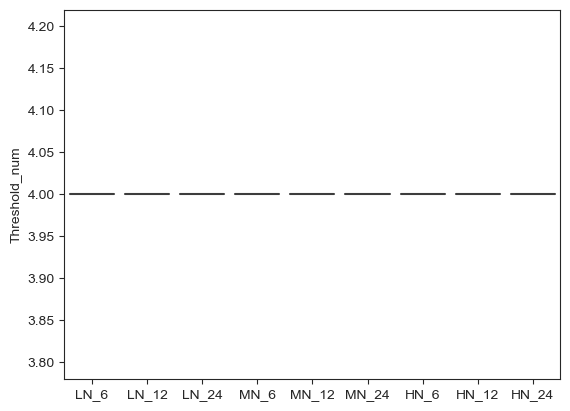

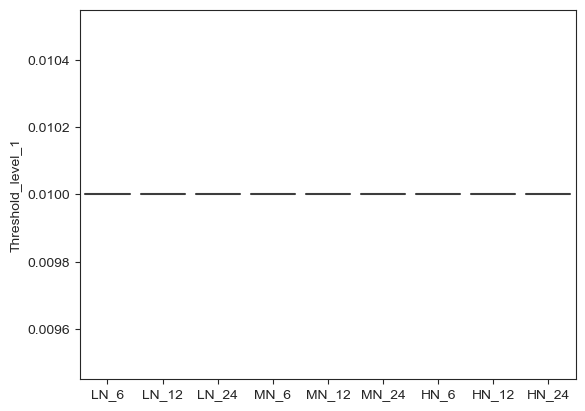

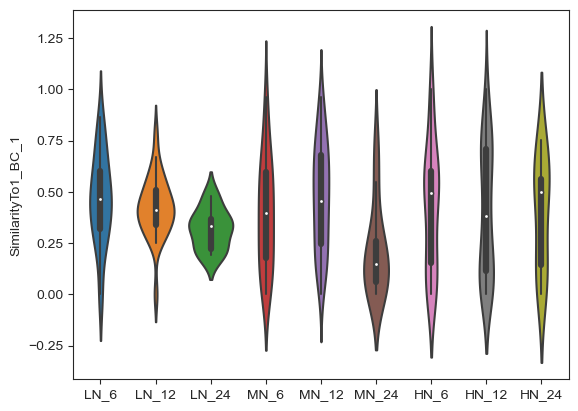

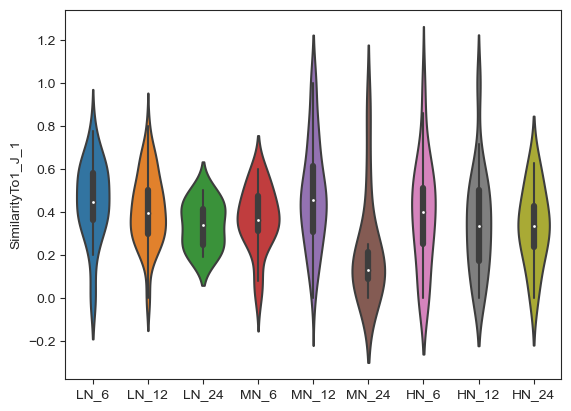

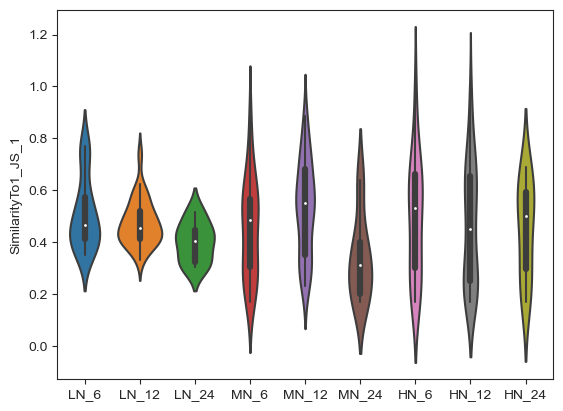

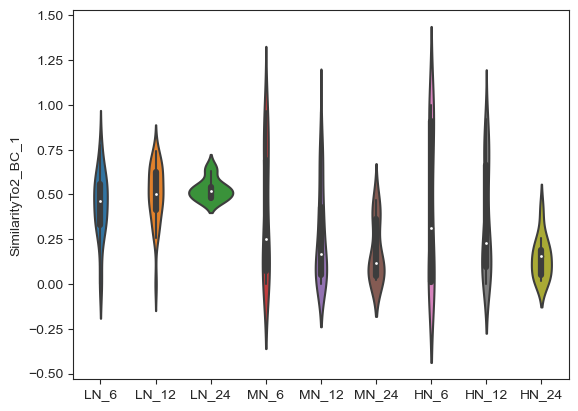

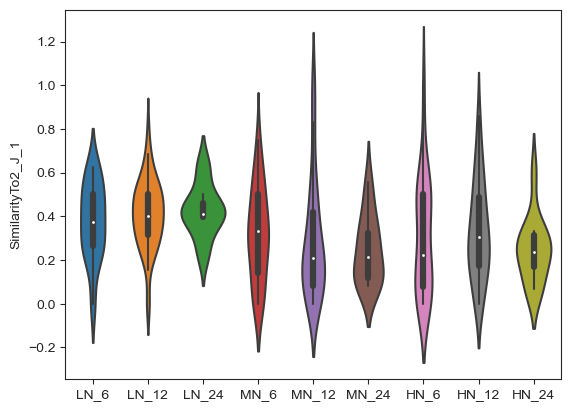

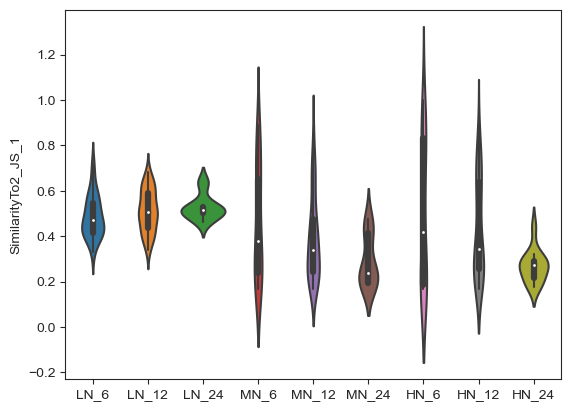

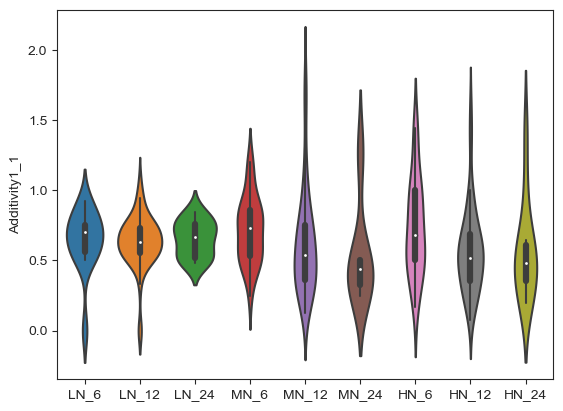

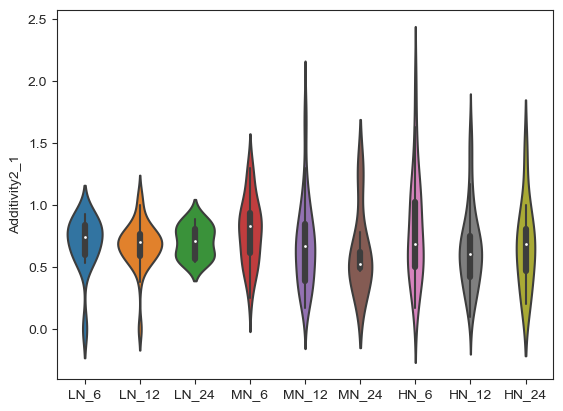

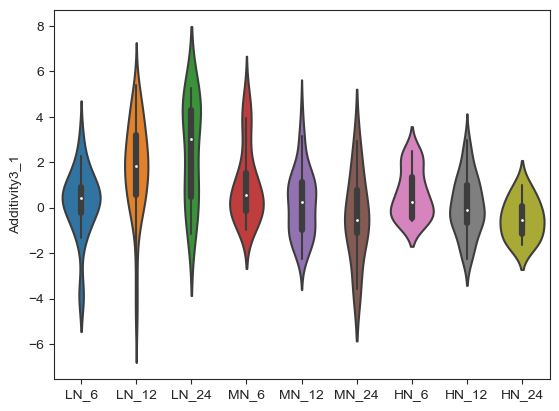

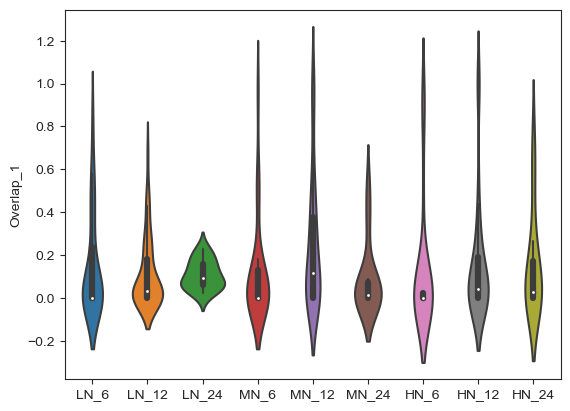

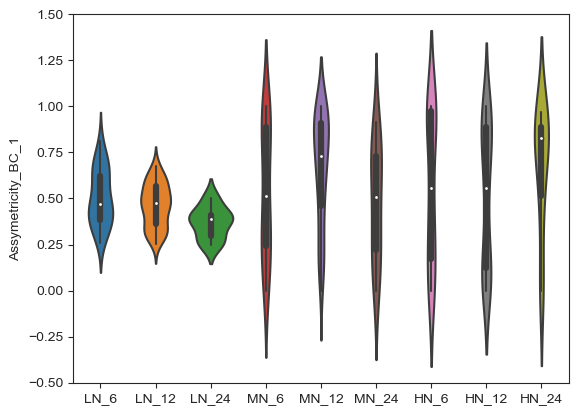

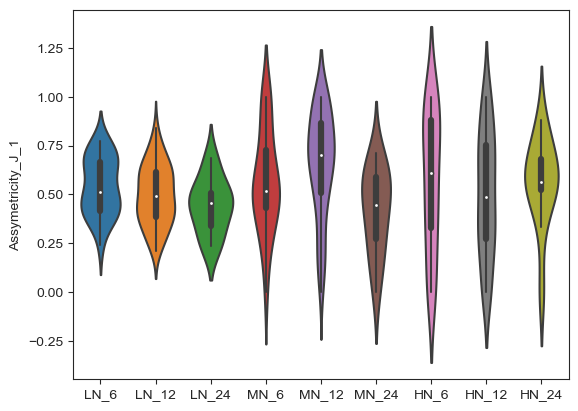

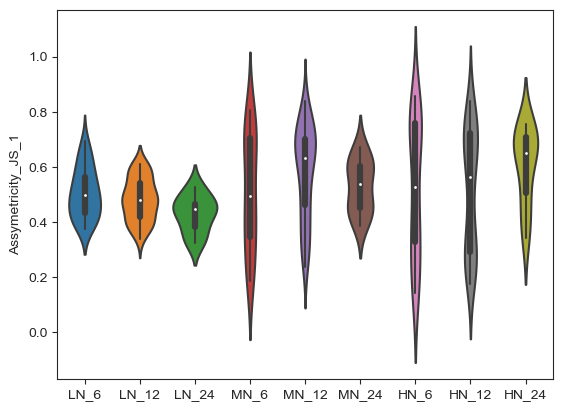

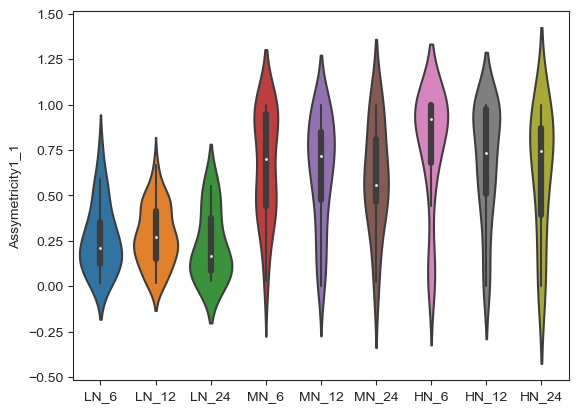

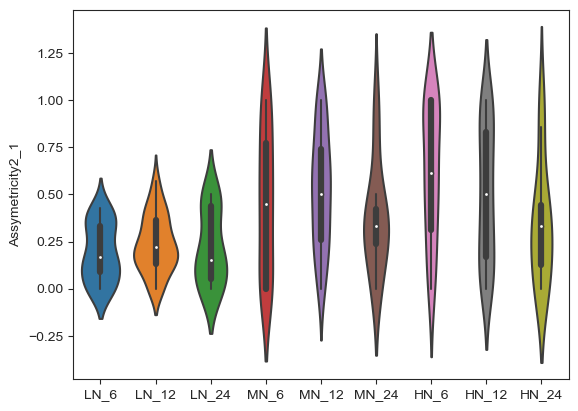

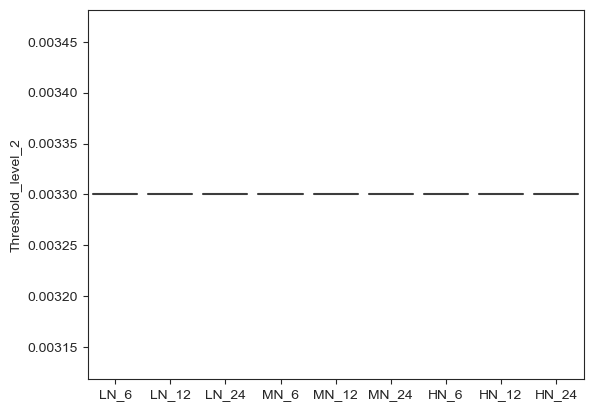

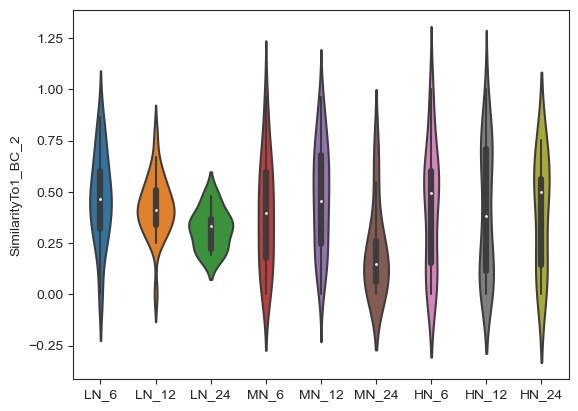

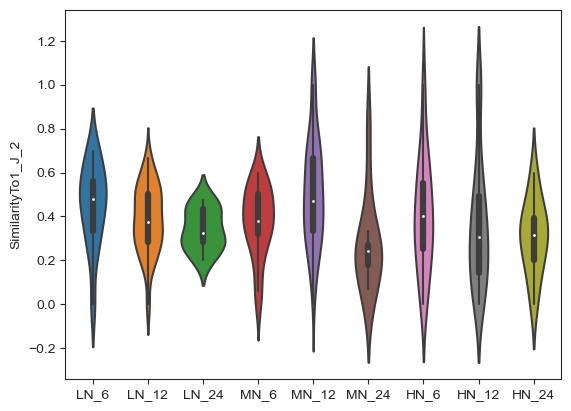

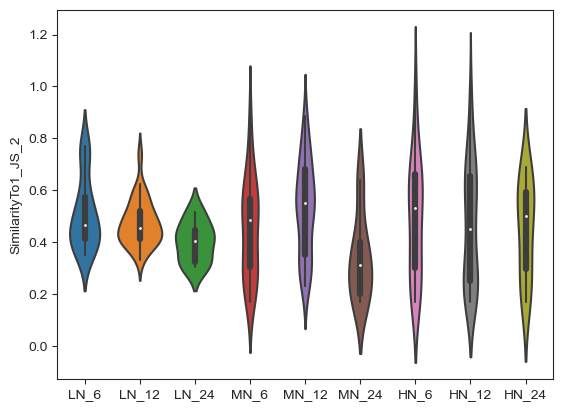

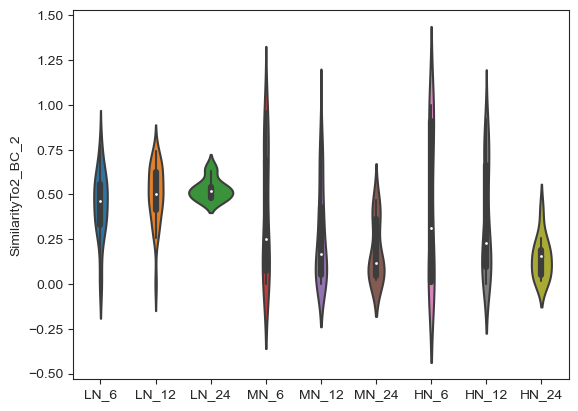

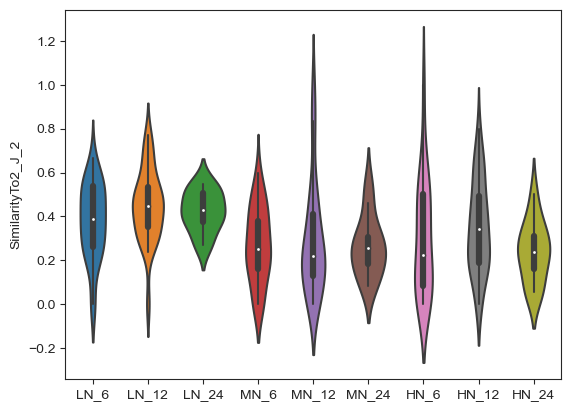

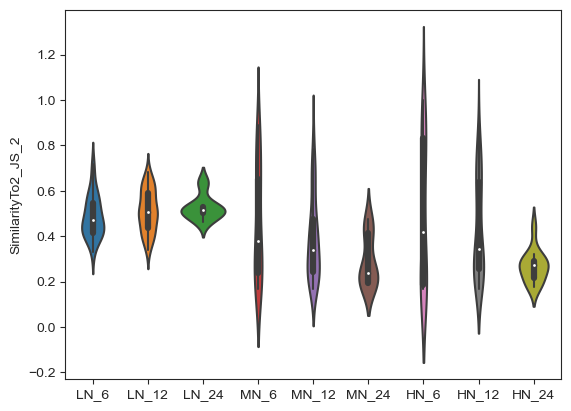

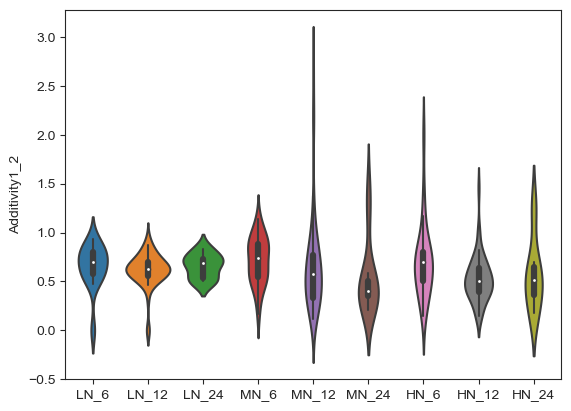

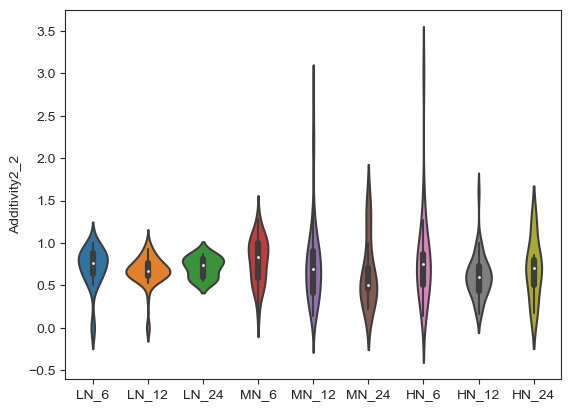

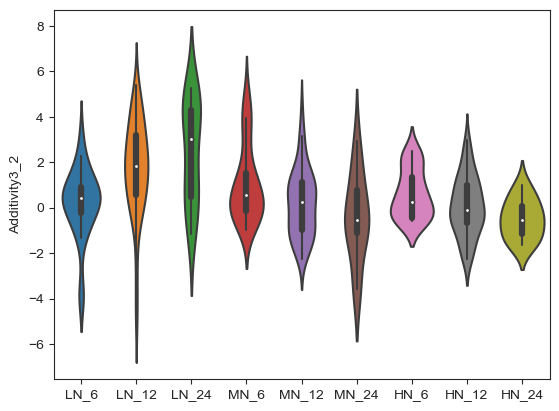

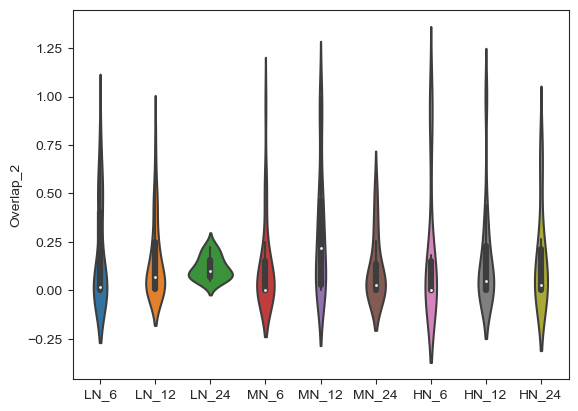

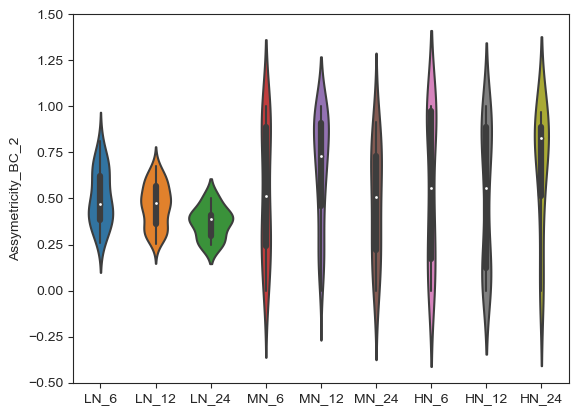

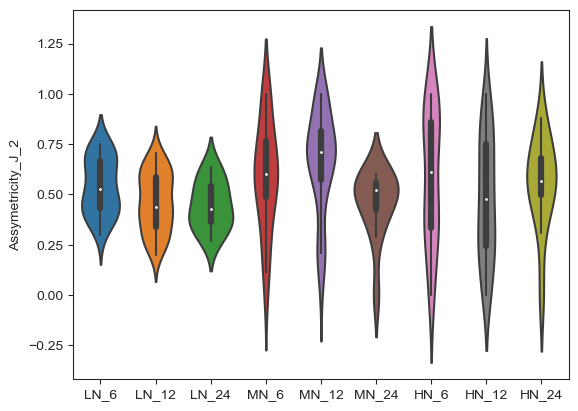

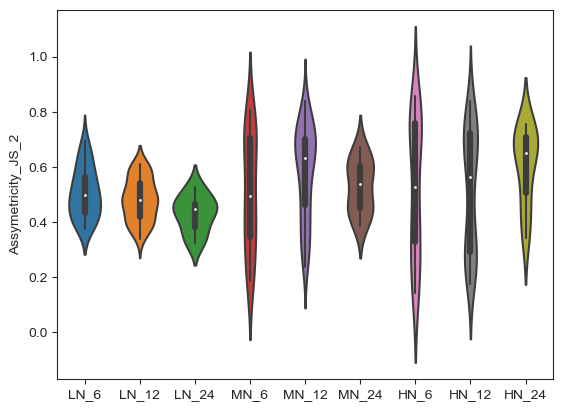

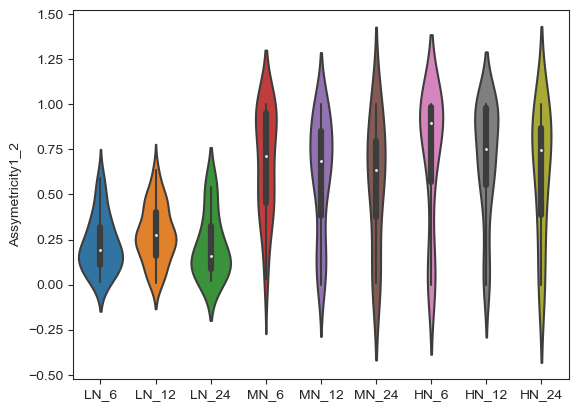

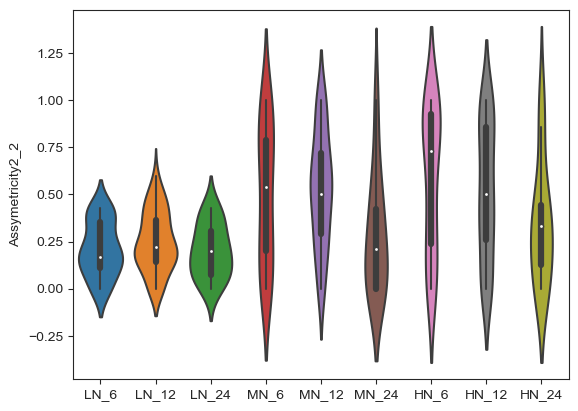

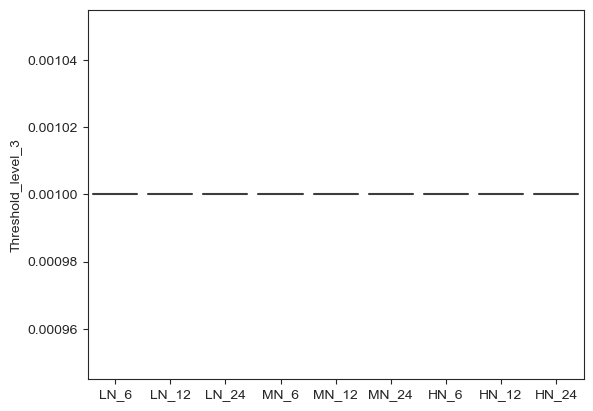

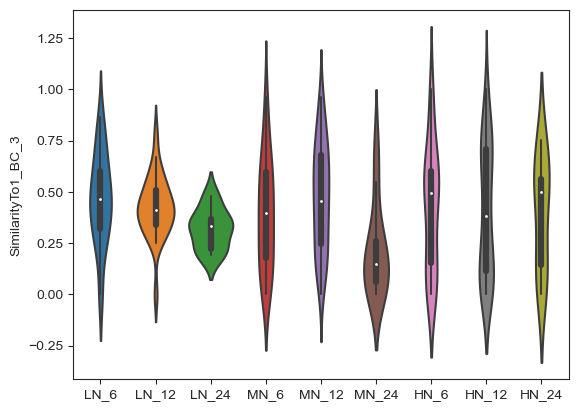

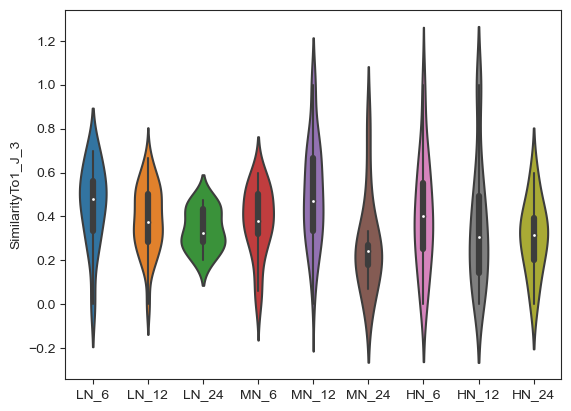

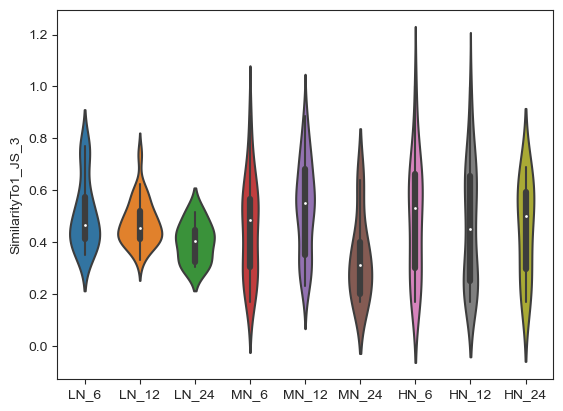

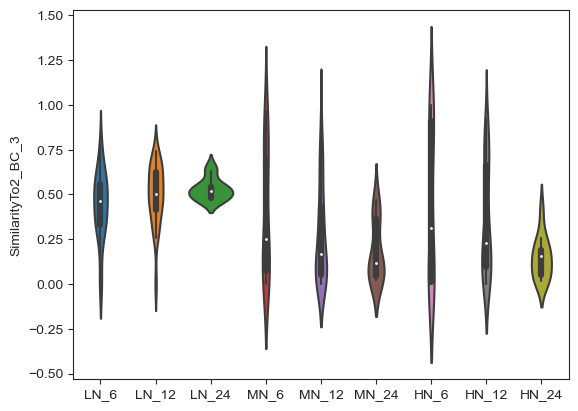

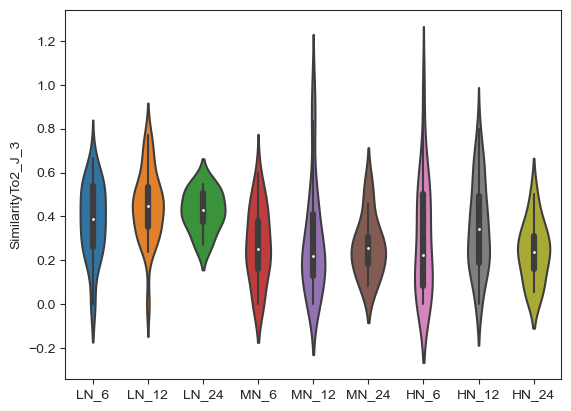

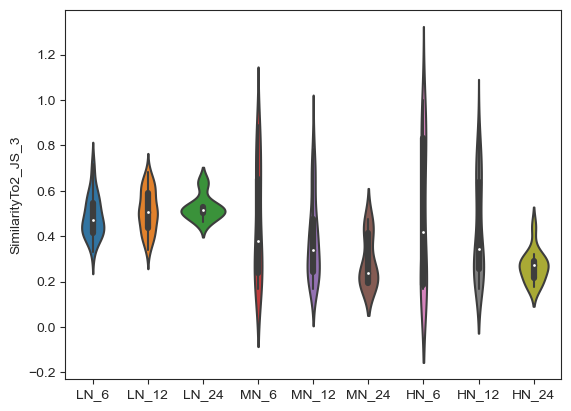

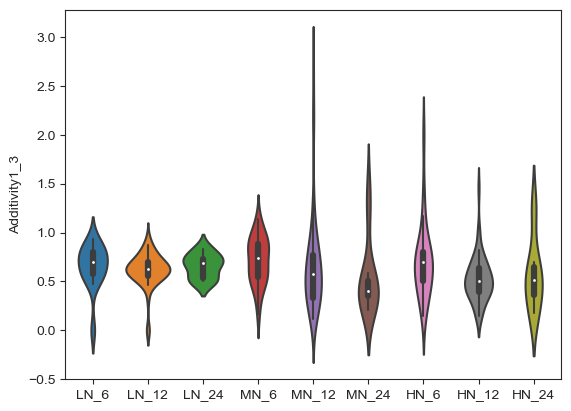

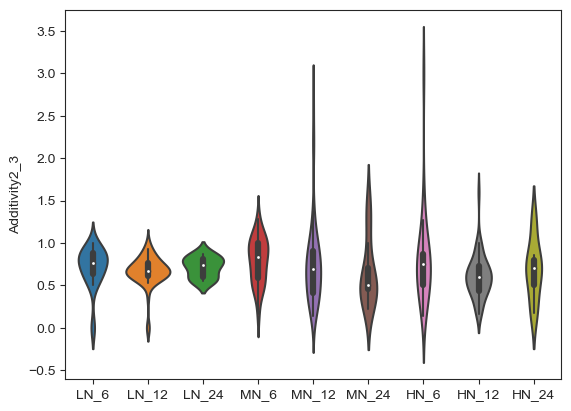

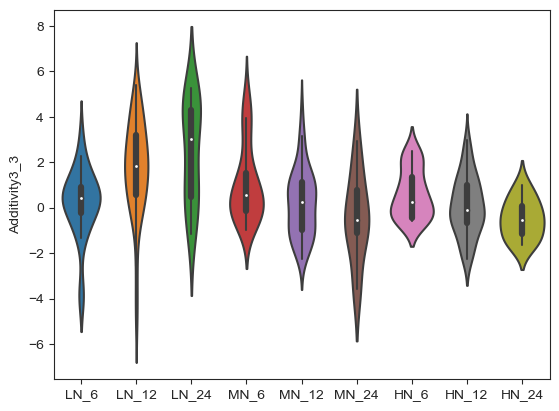

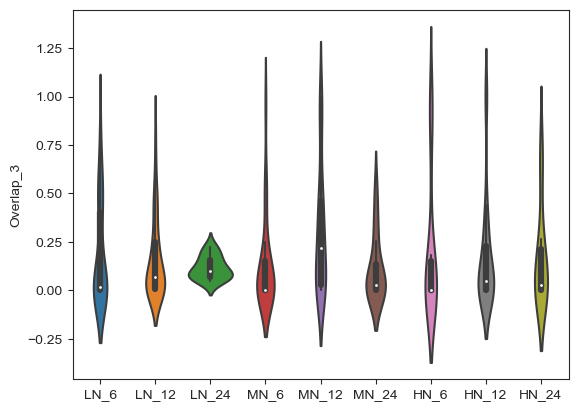

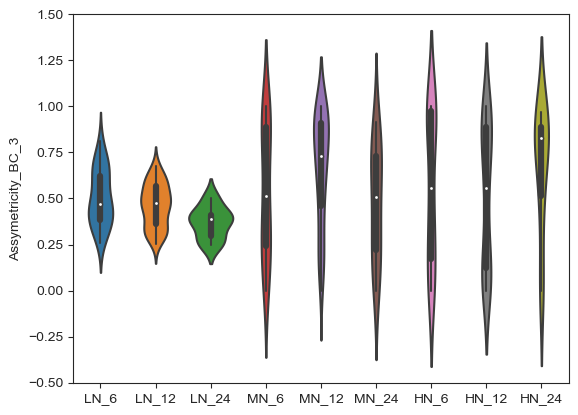

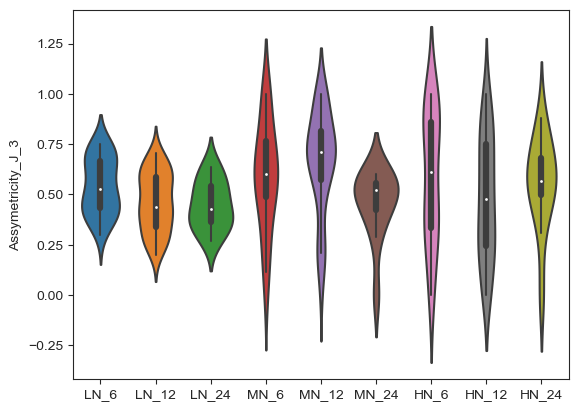

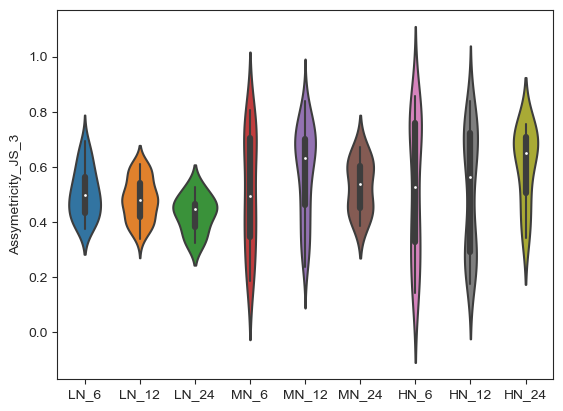

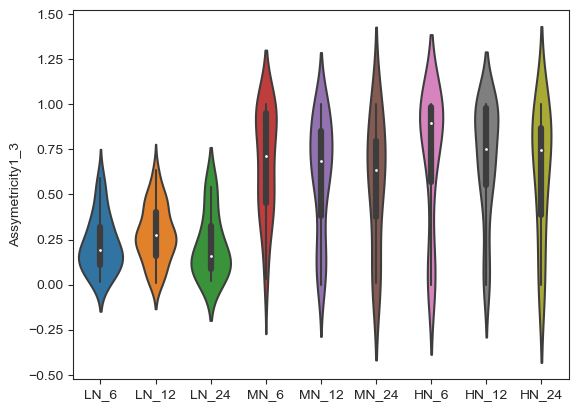

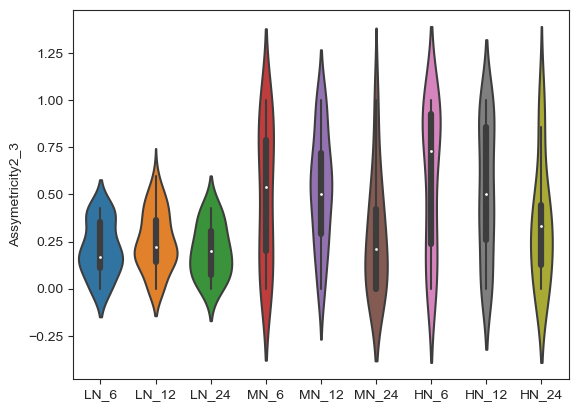

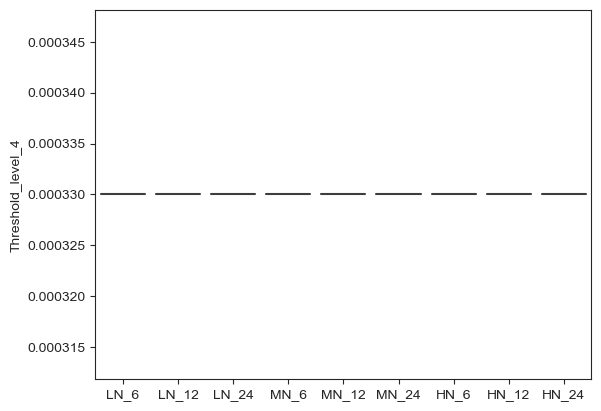

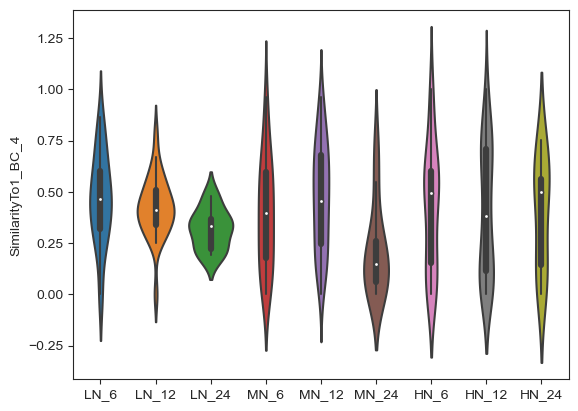

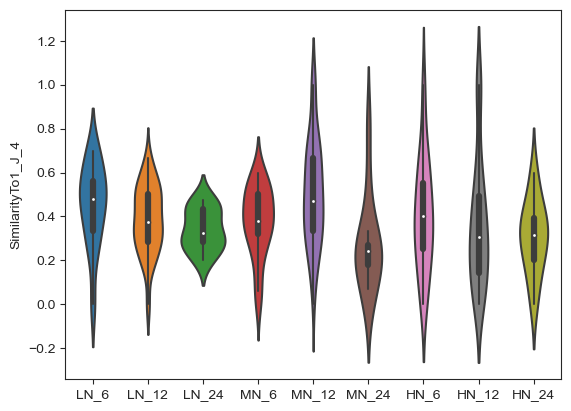

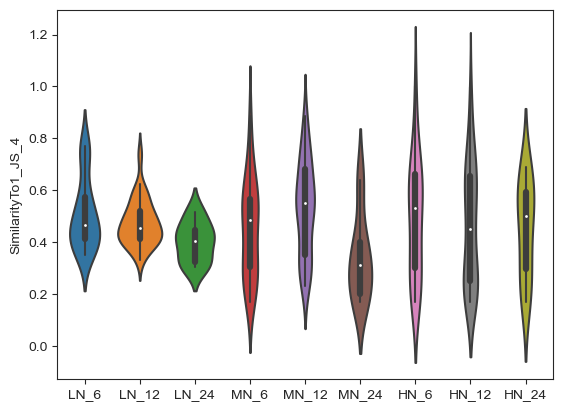

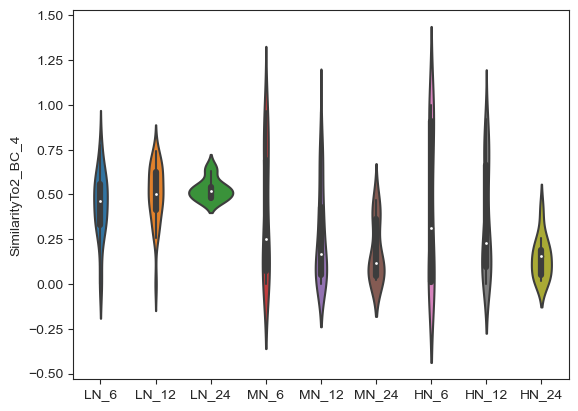

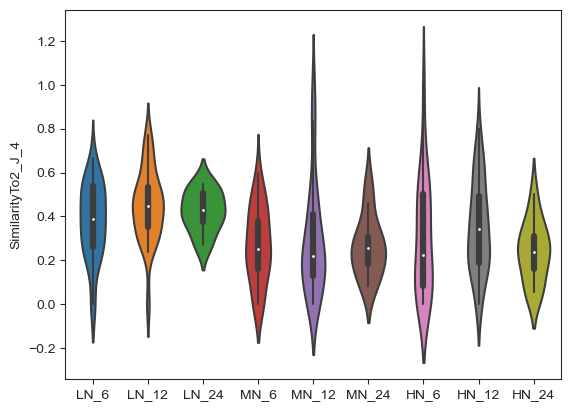

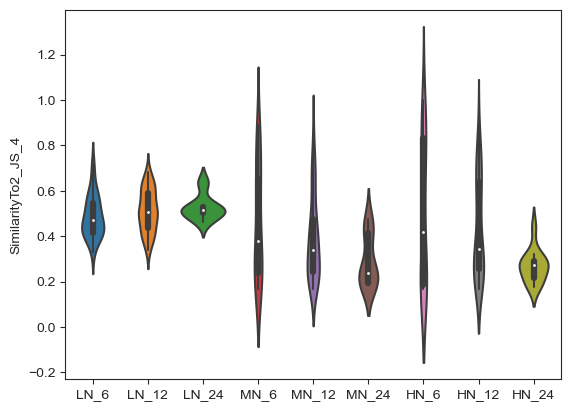

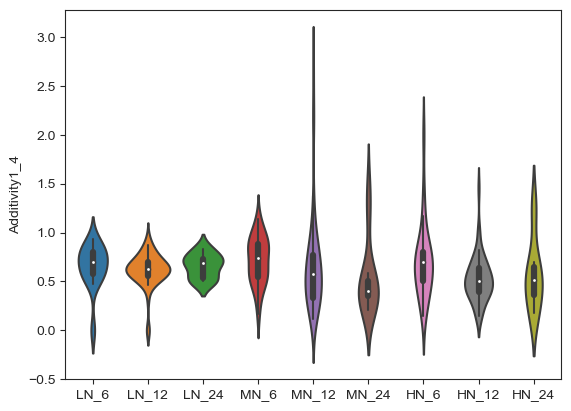

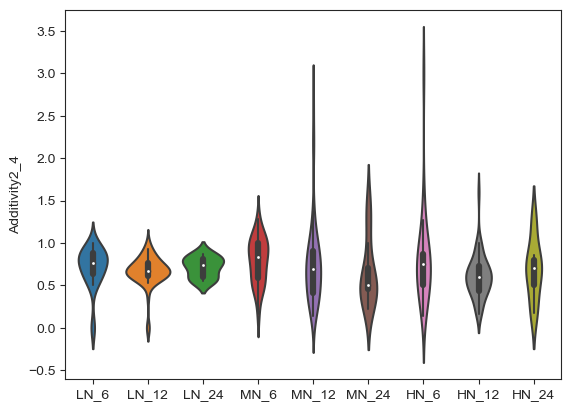

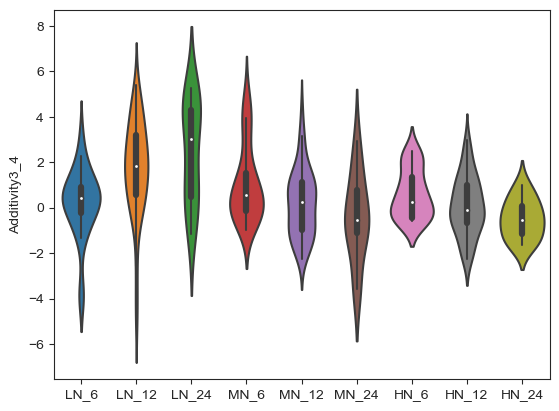

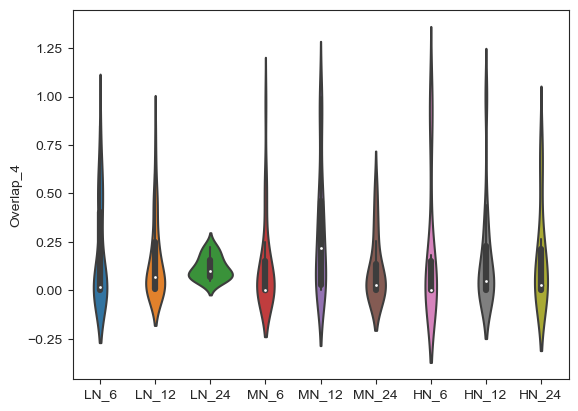

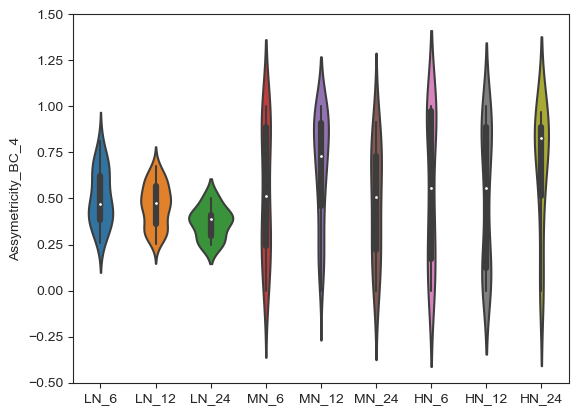

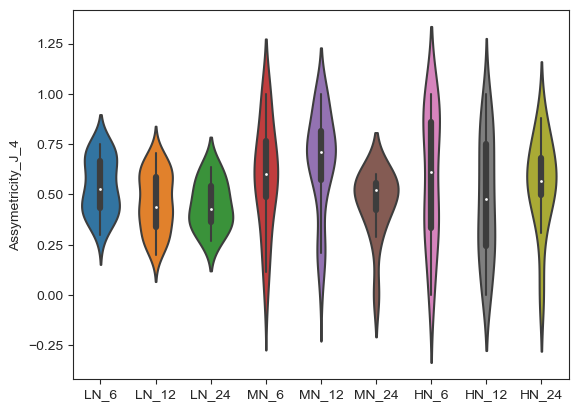

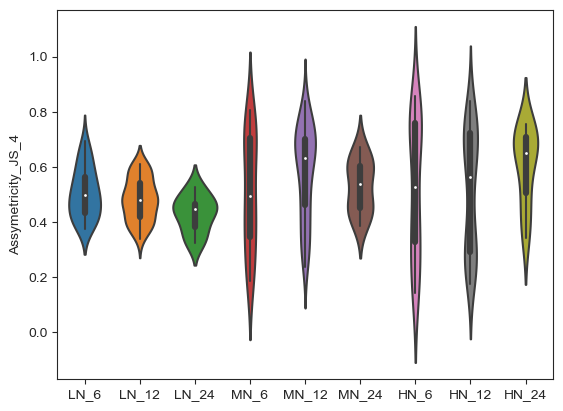

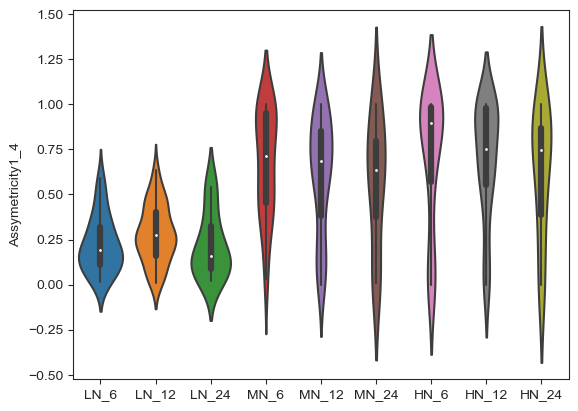

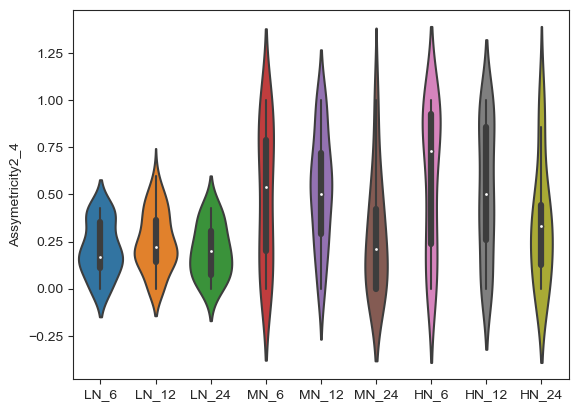

In [35]:

Variable2plot_list = [ 'Threshold_num', 'Threshold_level_1', 'SimilarityTo1_BC_1',
        'SimilarityTo1_J_1', 'SimilarityTo1_JS_1', 'SimilarityTo2_BC_1',
        'SimilarityTo2_J_1', 'SimilarityTo2_JS_1', 'Additivity1_1',
        'Additivity2_1', 'Additivity3_1', 'Overlap_1', 'Assymetricity_BC_1',
        'Assymetricity_J_1', 'Assymetricity_JS_1', 'Assymetricity1_1',
        'Assymetricity2_1', 'Threshold_level_2', 'SimilarityTo1_BC_2',
        'SimilarityTo1_J_2', 'SimilarityTo1_JS_2', 'SimilarityTo2_BC_2',
        'SimilarityTo2_J_2', 'SimilarityTo2_JS_2', 'Additivity1_2',
        'Additivity2_2', 'Additivity3_2', 'Overlap_2', 'Assymetricity_BC_2',
        'Assymetricity_J_2', 'Assymetricity_JS_2', 'Assymetricity1_2',
        'Assymetricity2_2', 'Threshold_level_3', 'SimilarityTo1_BC_3',
        'SimilarityTo1_J_3', 'SimilarityTo1_JS_3', 'SimilarityTo2_BC_3',
        'SimilarityTo2_J_3', 'SimilarityTo2_JS_3', 'Additivity1_3',
        'Additivity2_3', 'Additivity3_3', 'Overlap_3', 'Assymetricity_BC_3',
        'Assymetricity_J_3', 'Assymetricity_JS_3', 'Assymetricity1_3',
        'Assymetricity2_3', 'Threshold_level_4', 'SimilarityTo1_BC_4',
        'SimilarityTo1_J_4', 'SimilarityTo1_JS_4', 'SimilarityTo2_BC_4',
        'SimilarityTo2_J_4', 'SimilarityTo2_JS_4', 'Additivity1_4',
        'Additivity2_4', 'Additivity3_4', 'Overlap_4', 'Assymetricity_BC_4',
        'Assymetricity_J_4', 'Assymetricity_JS_4', 'Assymetricity1_4',
        'Assymetricity2_4']
for Variable2plot in Variable2plot_list:
    data_list = []
    type_list = []
    Name2show = Variable2plot
    plt.close()
    for j in range(len(mediums)):
        for i in  range(len(species_pools)):
            M = mediums[j]
            S = species_pools[i]
            type_name = M + "_" + str(S)
            IDX = [getIDX(Coalescence_data, x) for x in Synthetic_IDX[type_name]]
            data = Coalescence_data[Variable2plot][np.concatenate(IDX)]
            data_list.extend(data)
            type_list.extend([type_name] * len(data))

    daynames = ["LN_6", "LN_12", "LN_24", "MN_6", "MN_12", "MN_24", "HN_6", "HN_12", "HN_24"]
    x =type_list
    y = data_list
    sns.violinplot(x=x,y=y)
    plt.ylabel(Variable2plot)
    #plt.xlabel(("Coalescence Type, Medium, and Number of Species"))
    plt.show()
    fig.savefig("Figures/Coal_Analysis"+Variable2plot+"_violinplot.png", bbox_inches='tight')
    

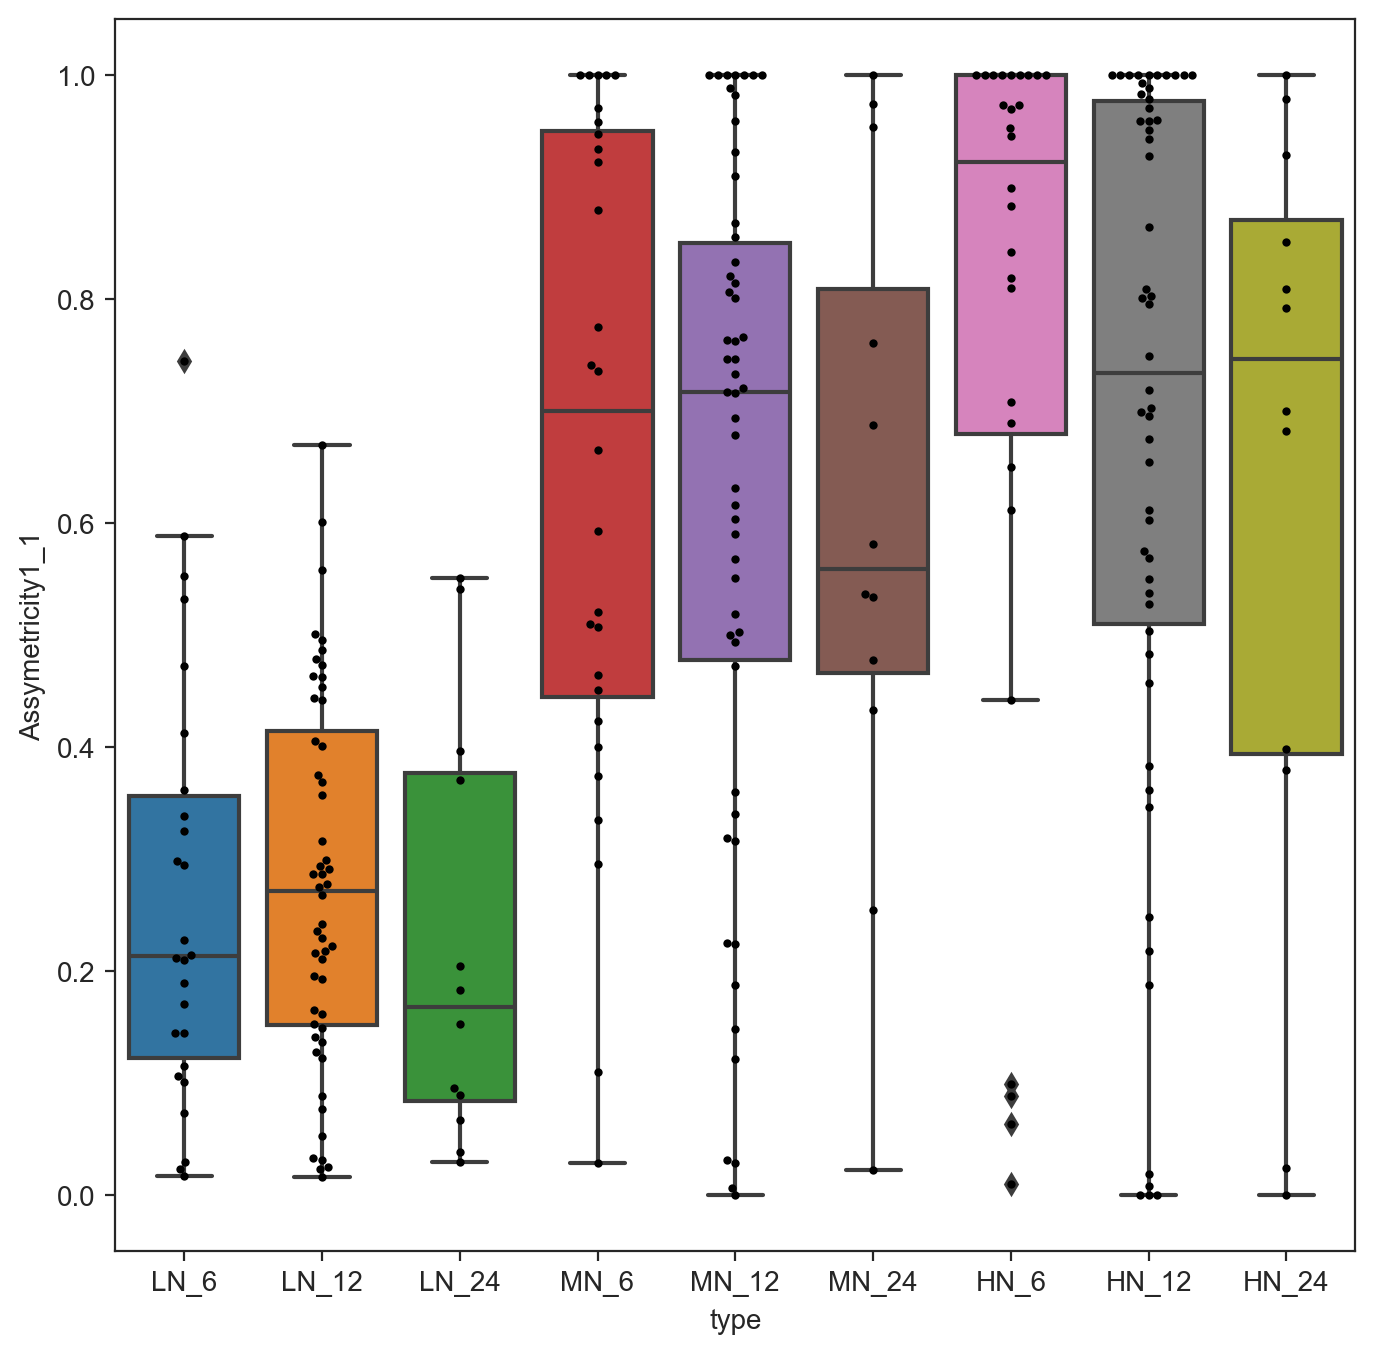

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

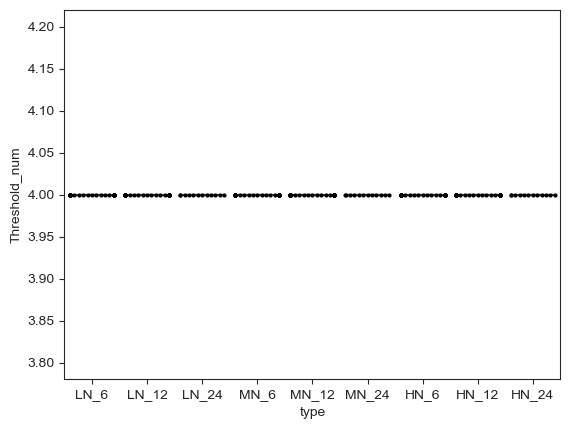

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

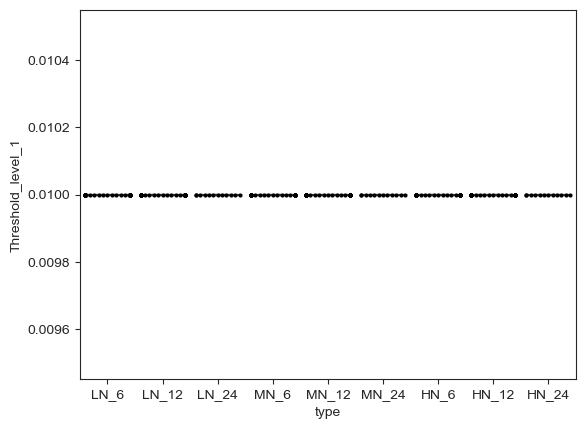

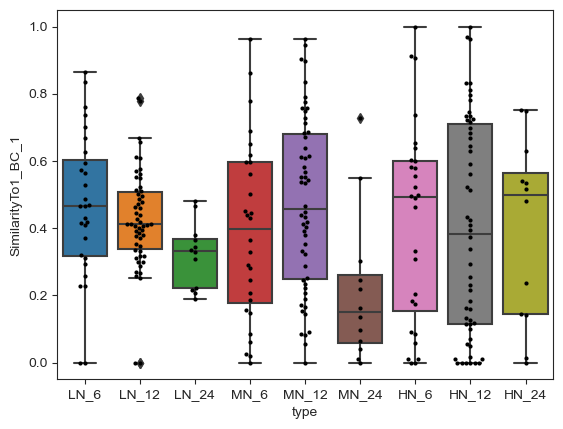

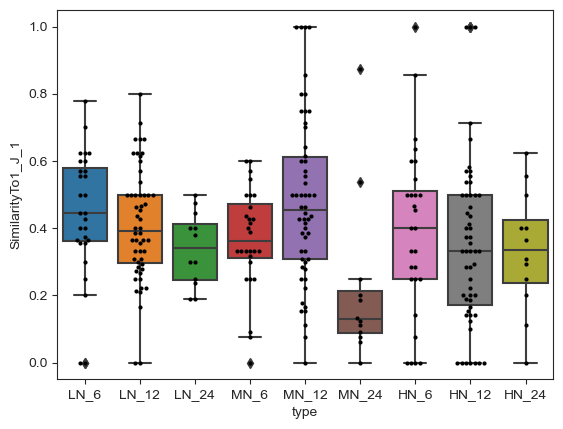

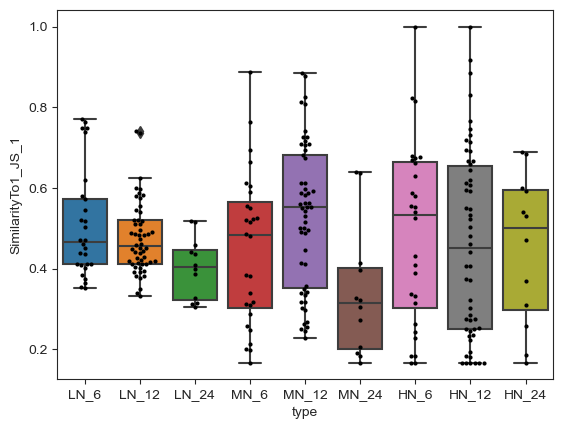

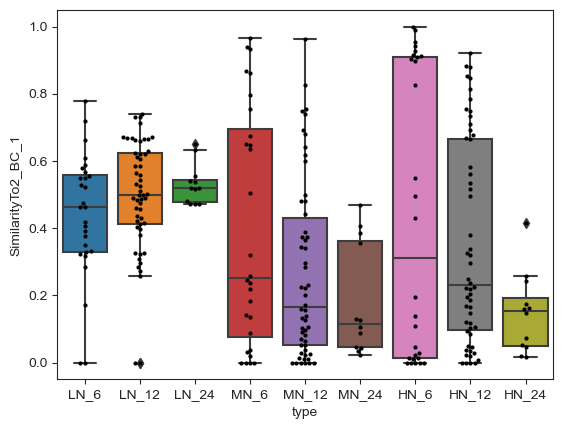

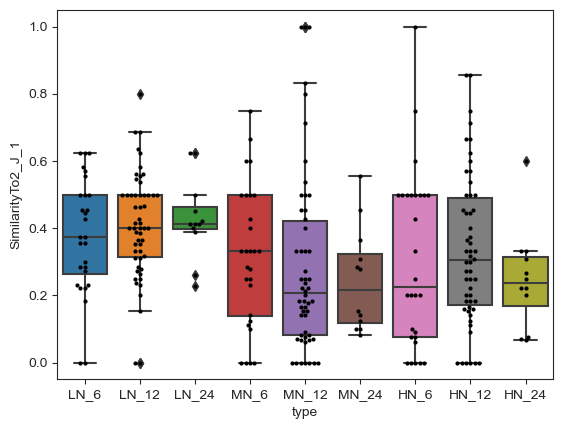

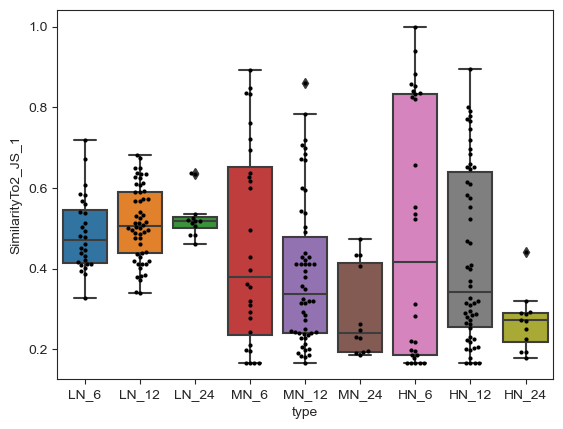

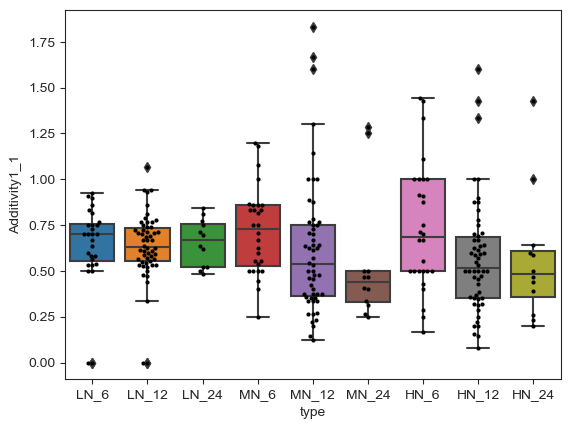

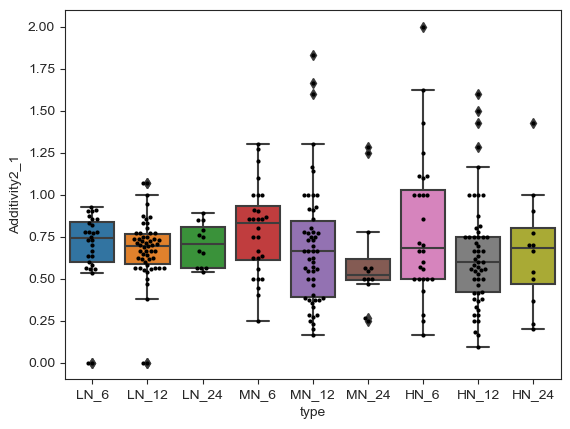

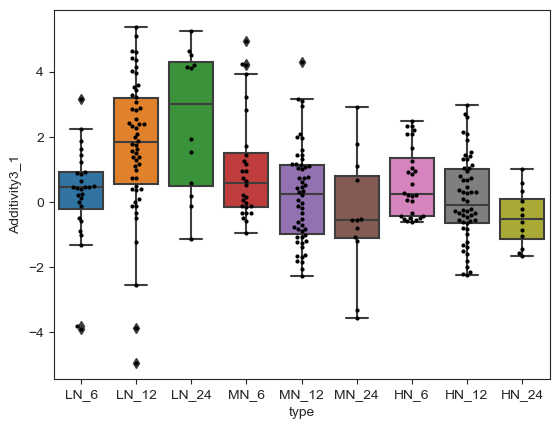

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/mi

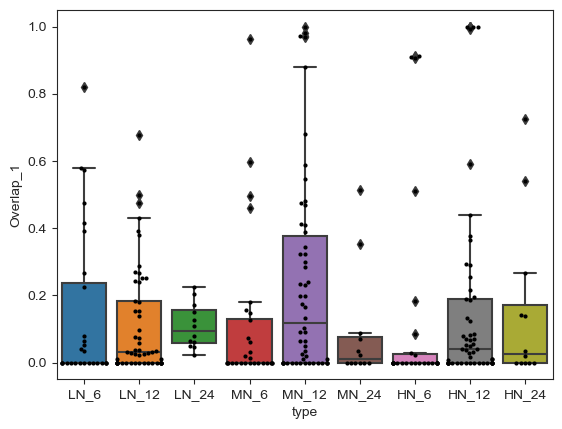

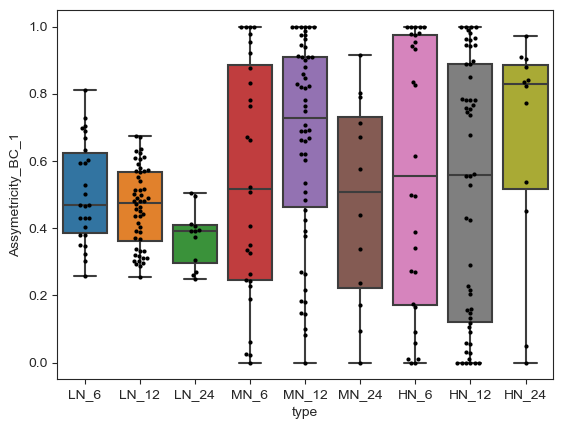

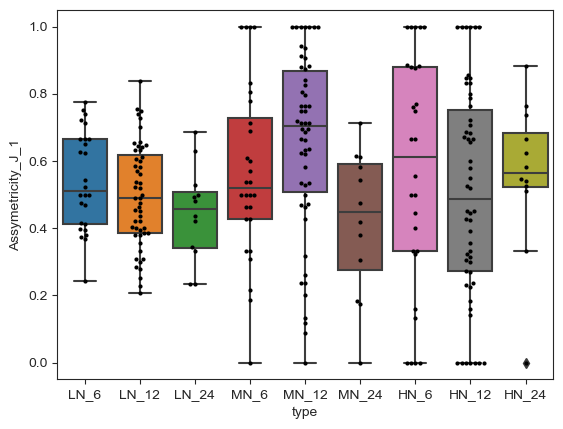

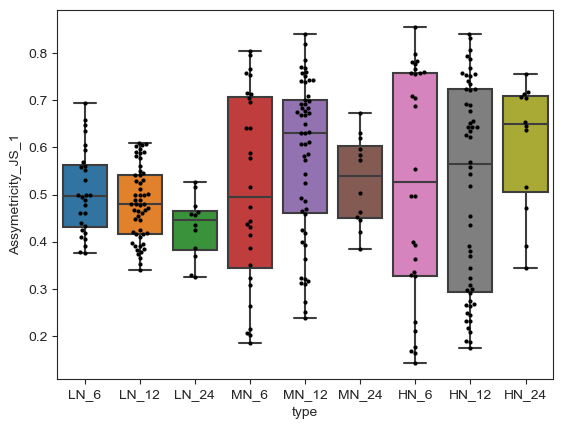

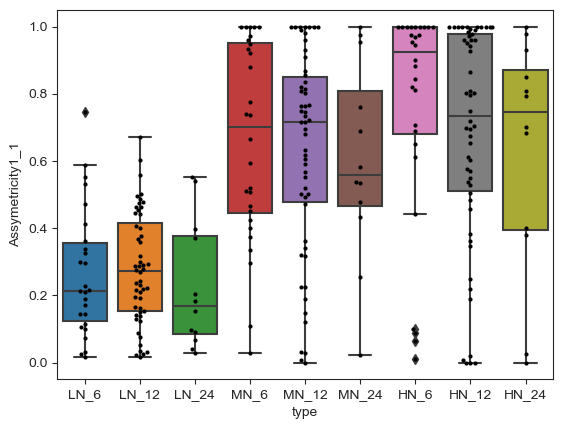

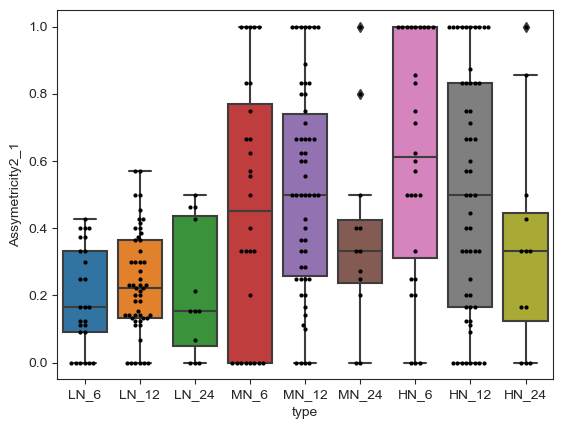

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

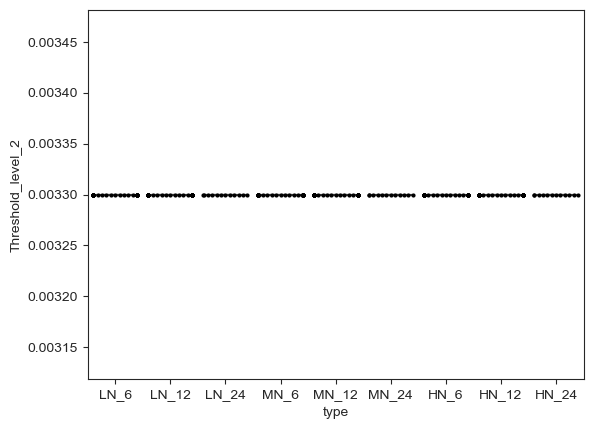

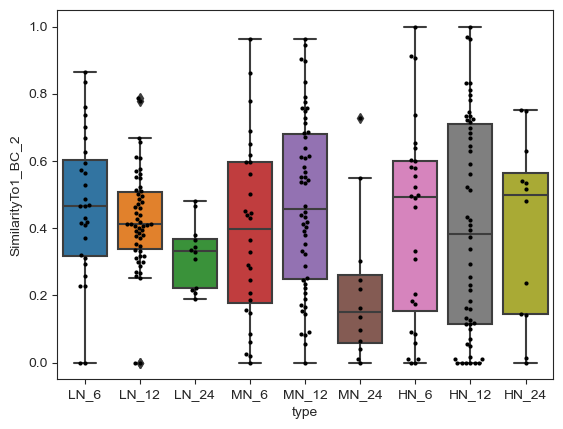

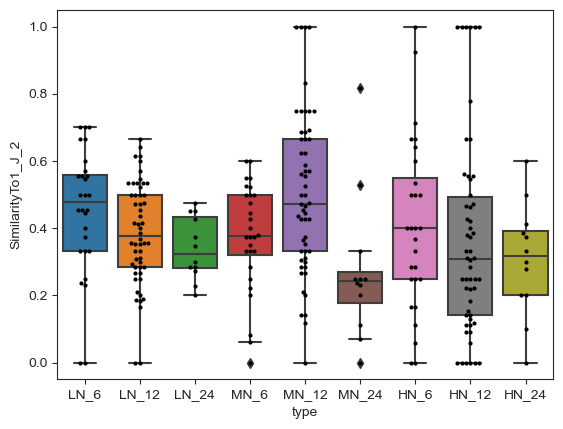

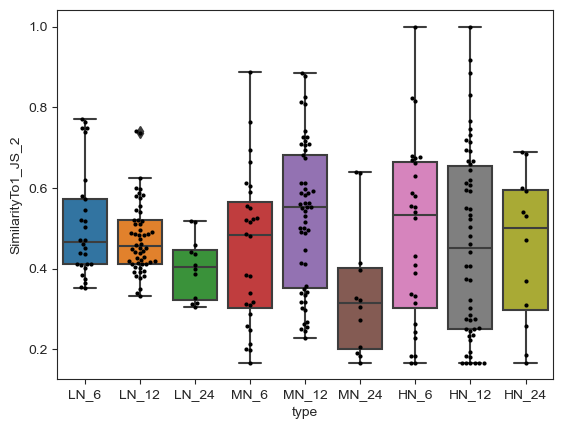

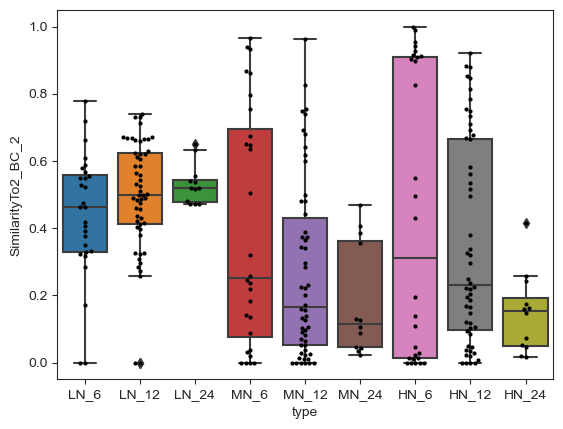

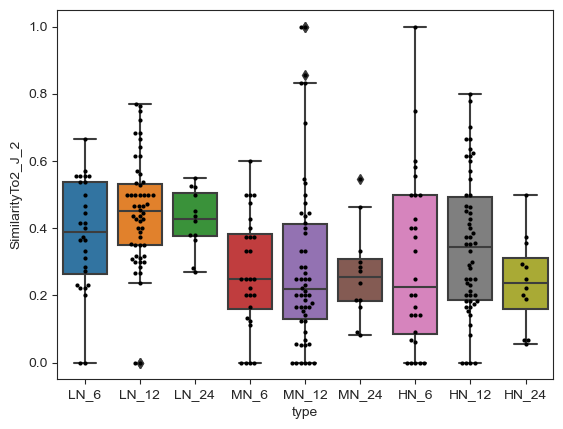

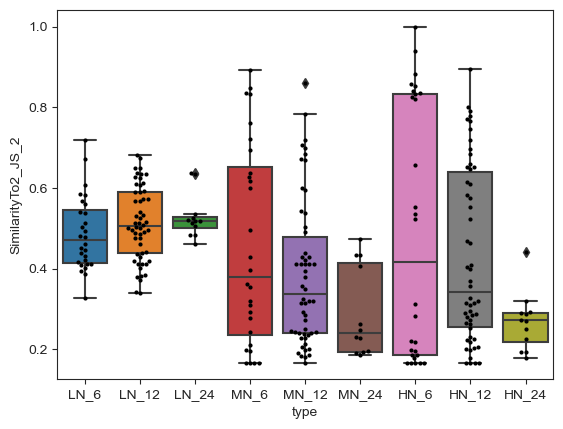

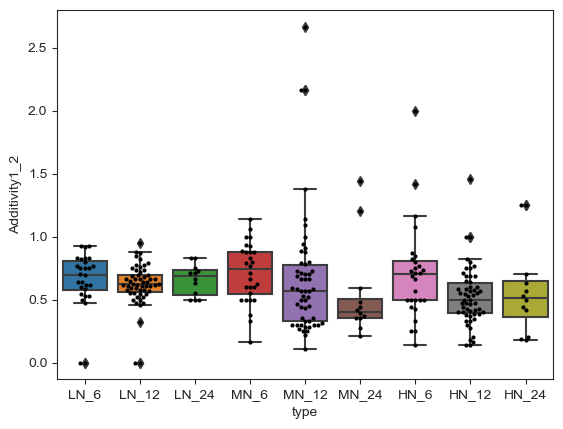

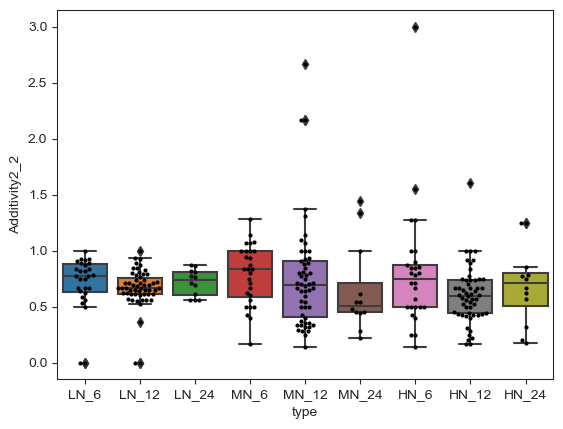

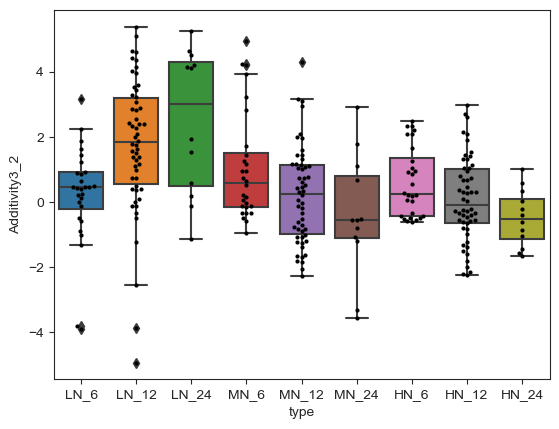

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

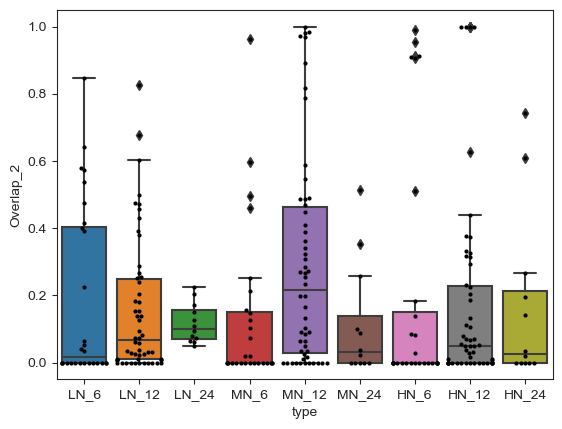

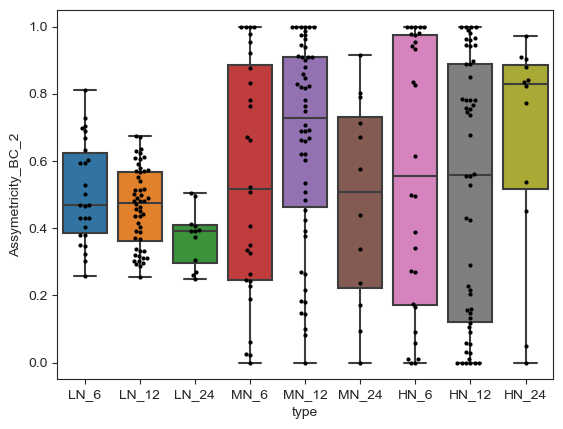

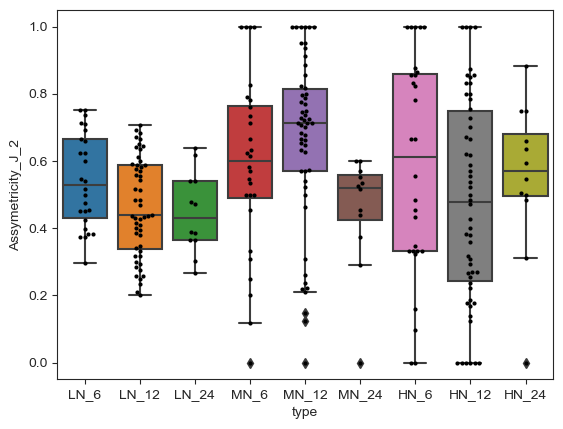

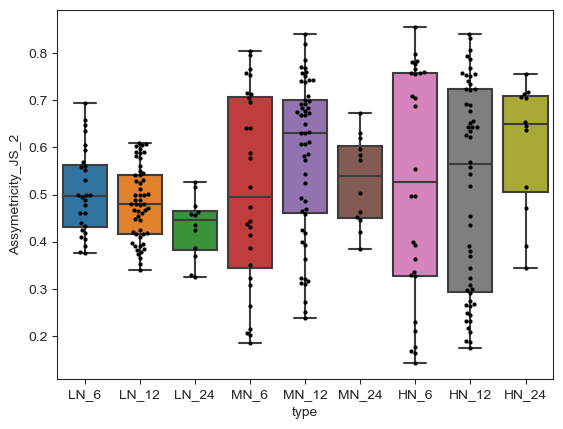

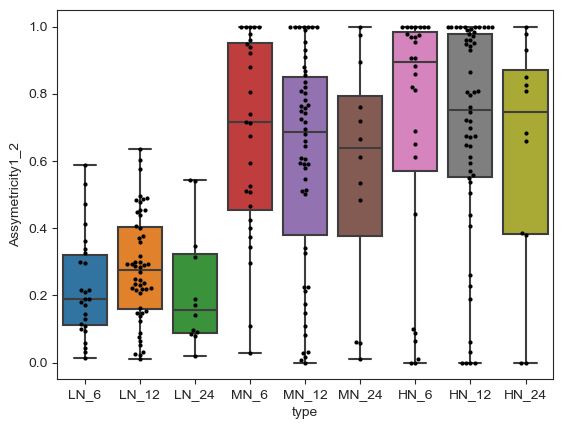

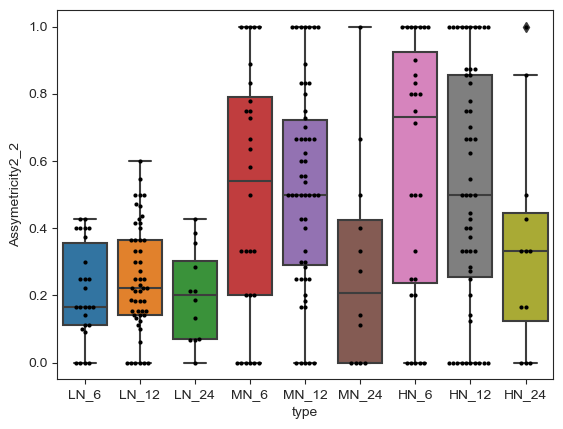

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

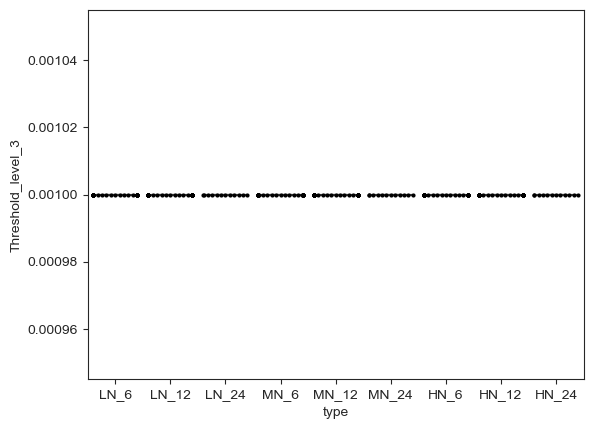

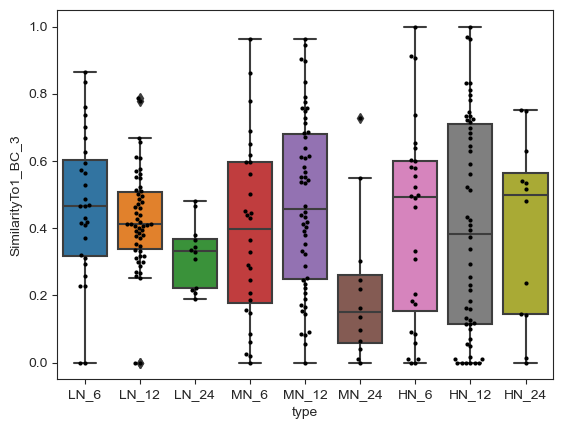

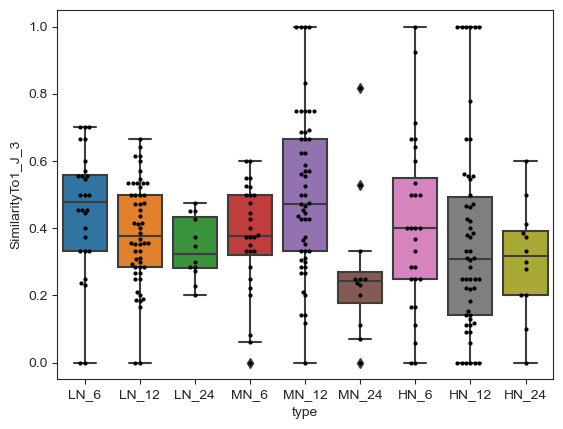

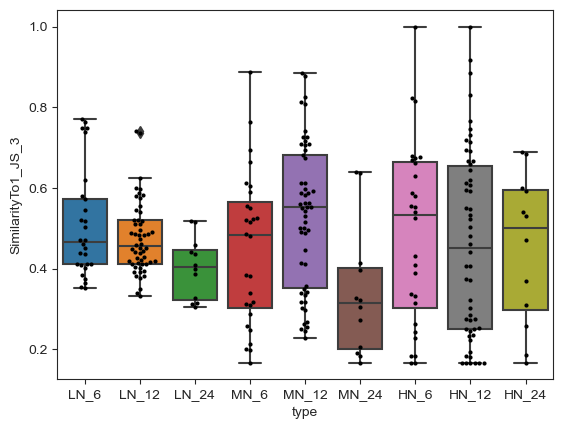

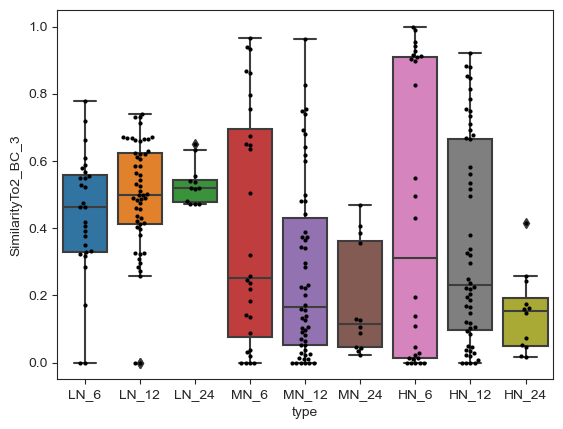

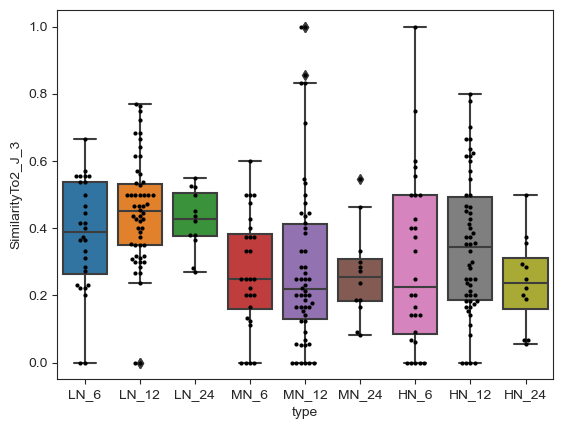

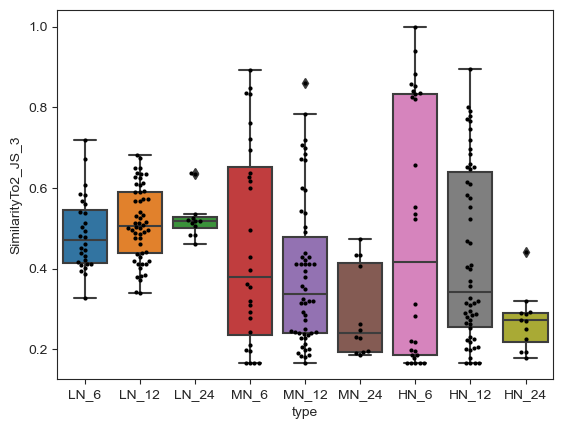

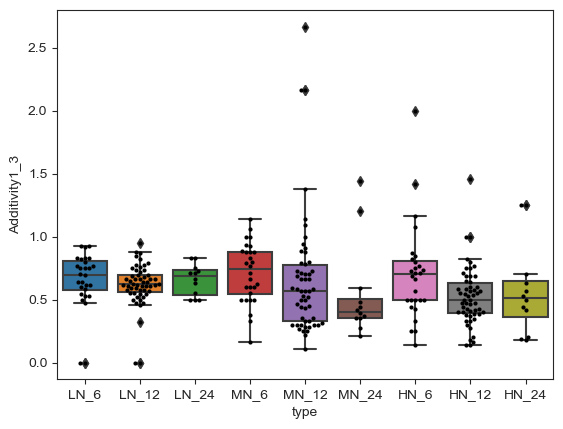

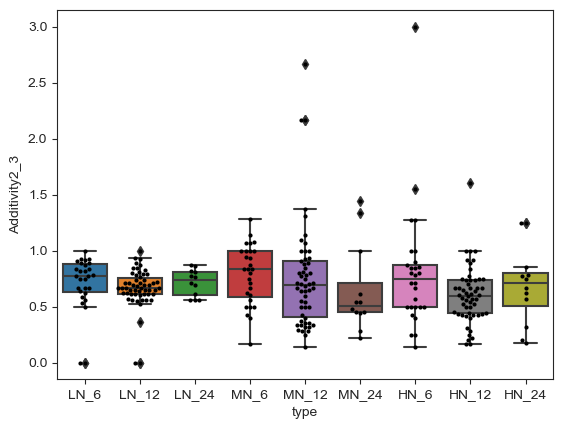

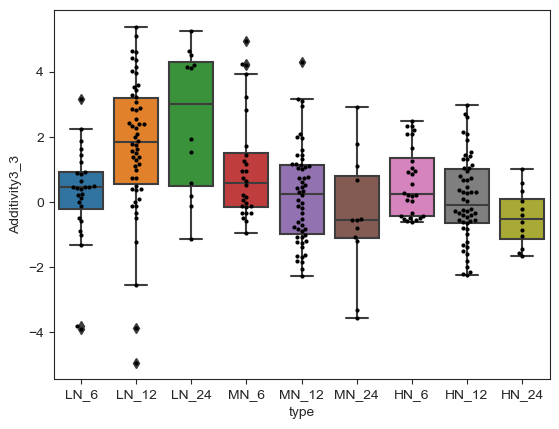

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

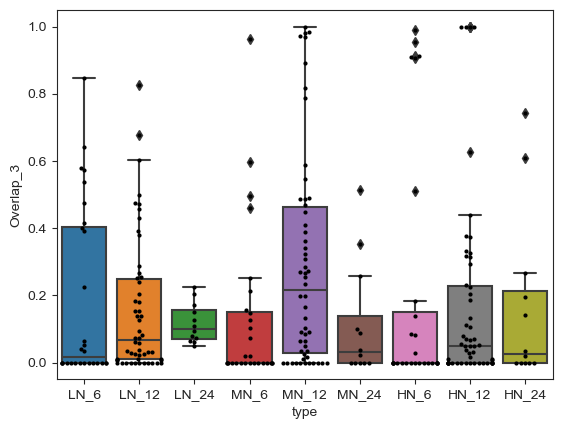

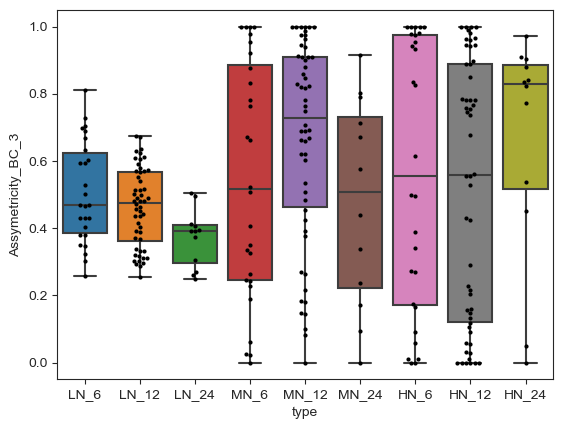

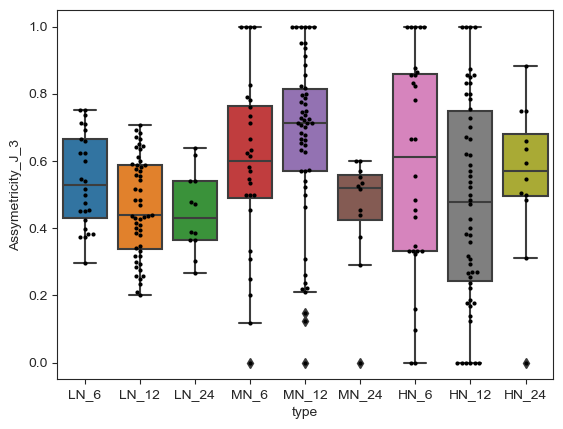

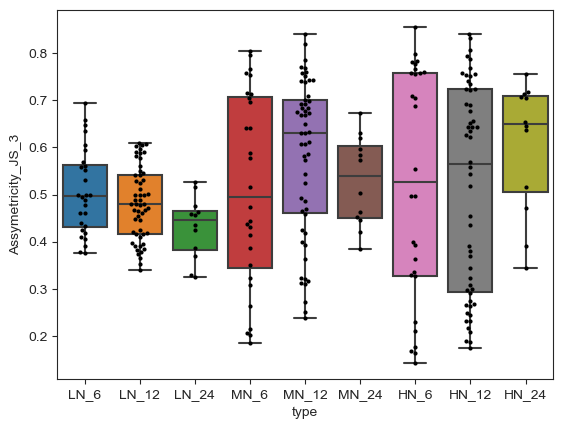

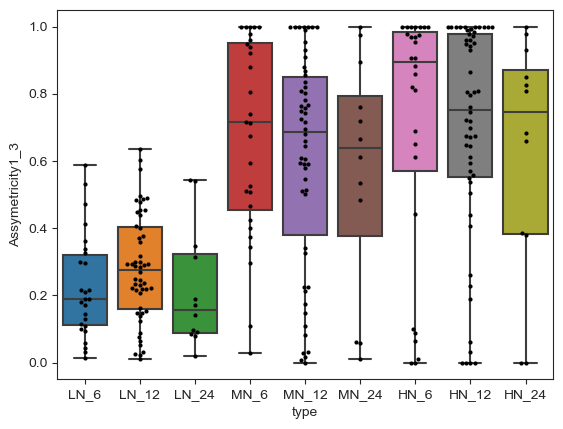

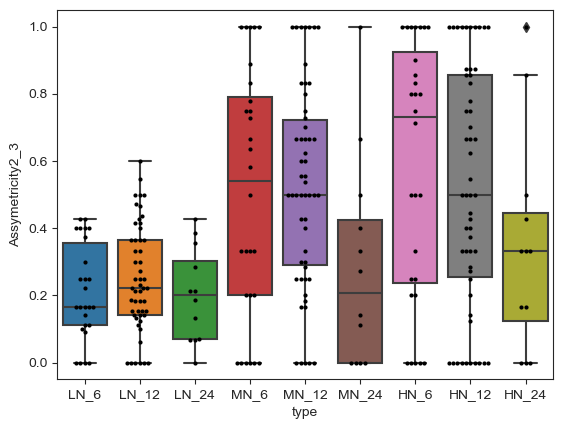

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

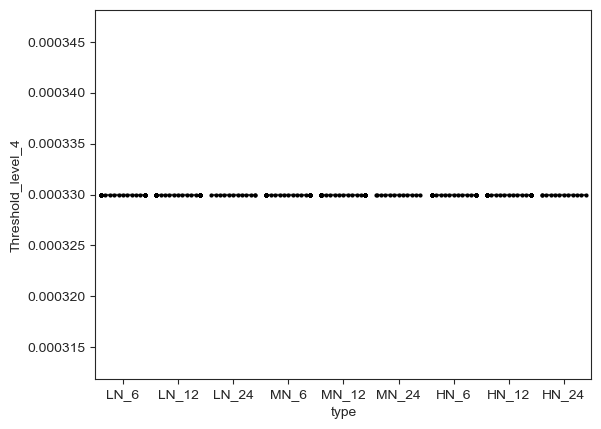

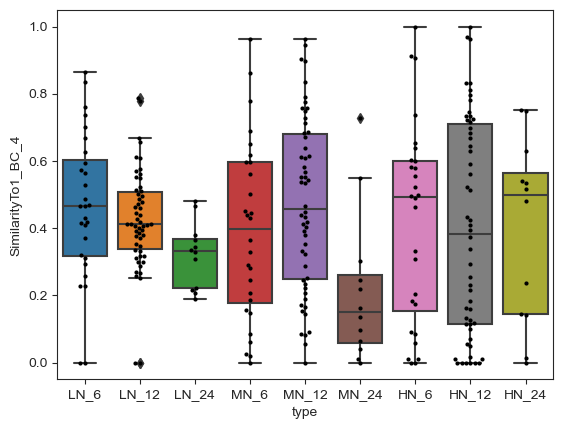

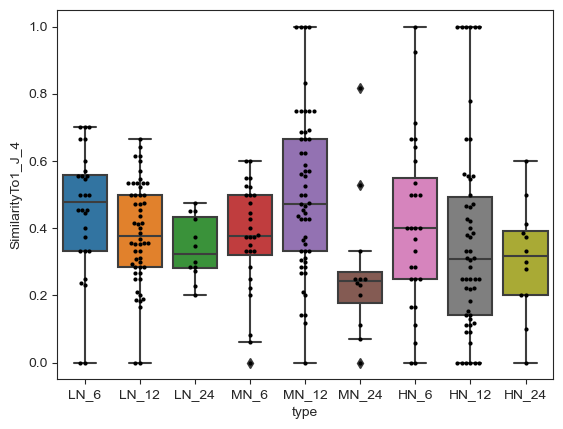

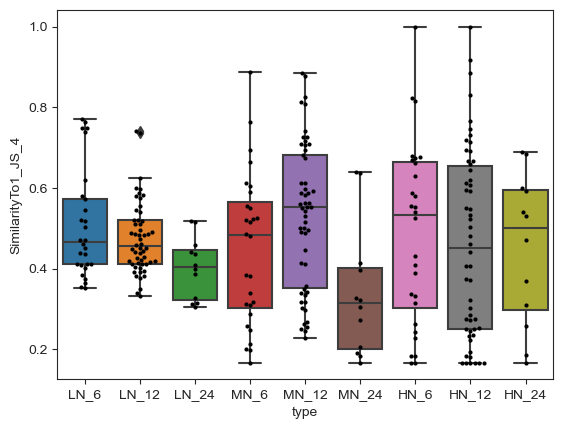

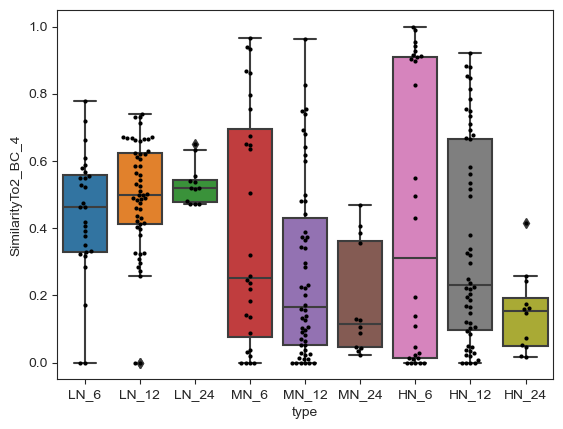

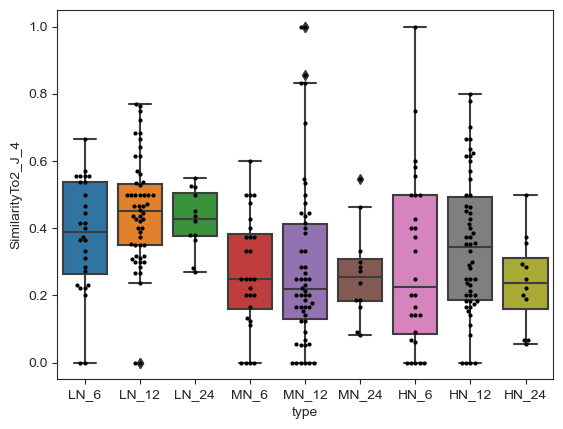

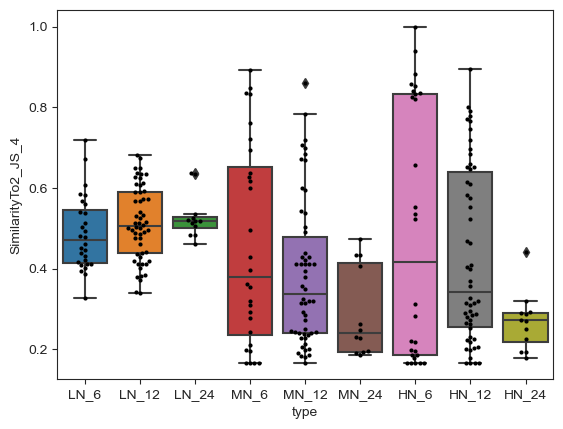

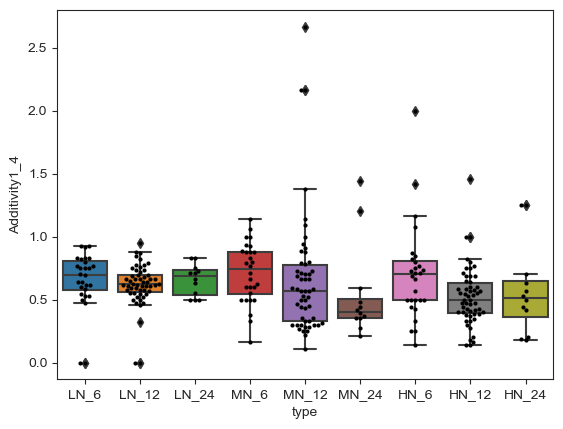

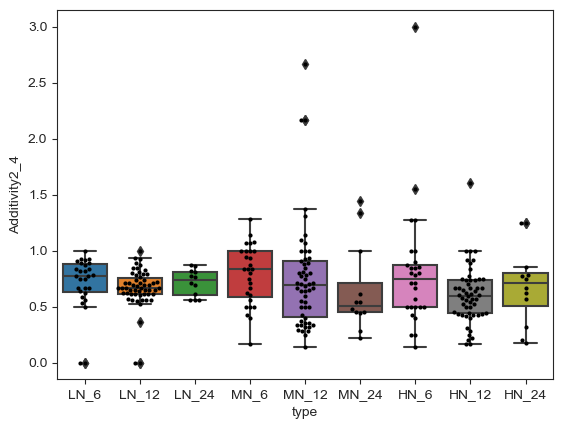

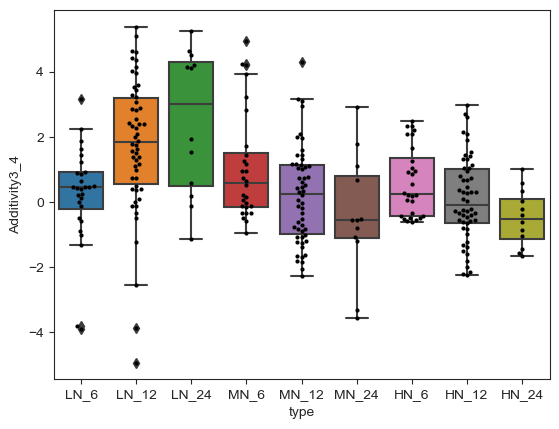

/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/miniconda3/envs/jy_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jysong/min

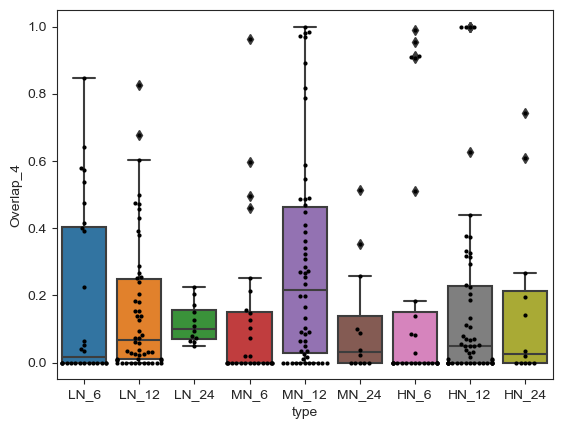

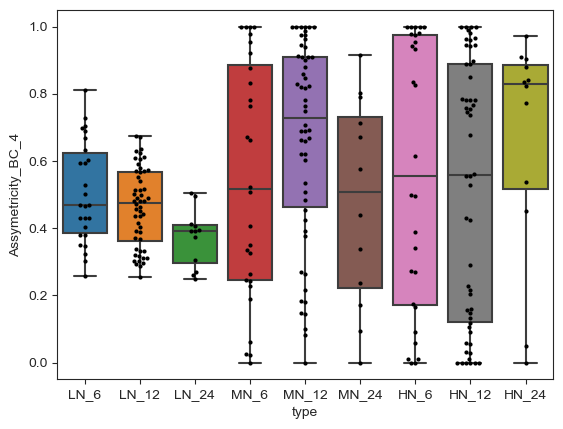

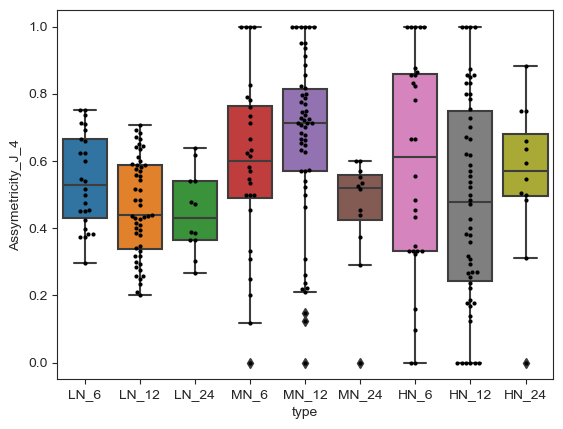

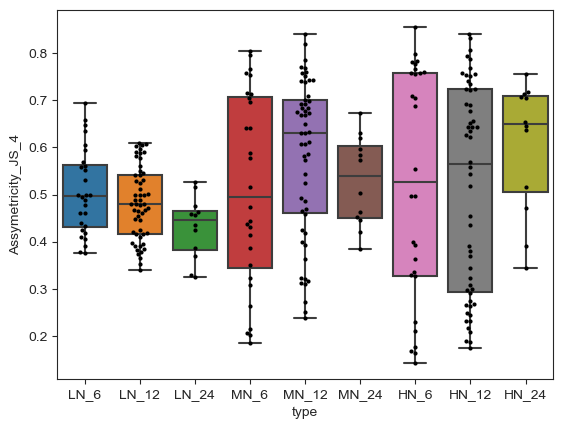

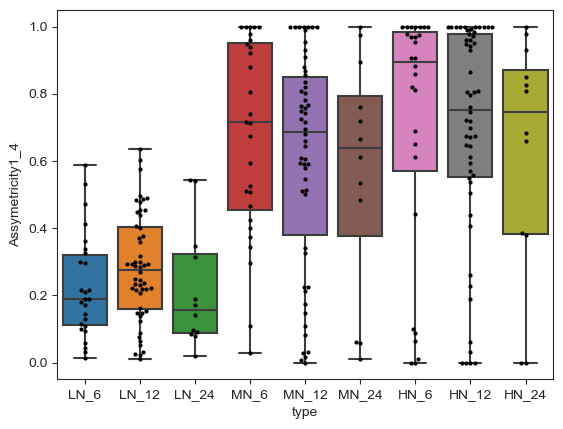

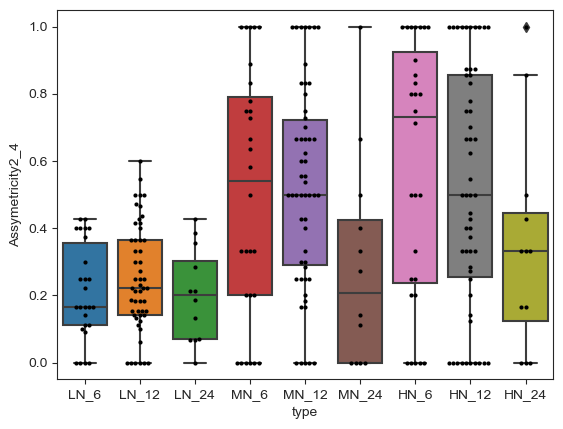

In [36]:
data_list = []
type_list = []
Variable2plot = "Assymetricity1_1"
Name2show = Variable2plot
fig=figure(num=None, figsize=(8, 8), dpi=200, facecolor='w', edgecolor='k')
for j in range(len(mediums)):
    for i in  range(len(species_pools)):
        M = mediums[j]
        S = species_pools[i]
        type_name = M + "_" + str(S)
        IDX = [getIDX(Coalescence_data, x) for x in Synthetic_IDX[type_name]]
        data = Coalescence_data[Variable2plot][np.concatenate(IDX)]
        data_list.extend(data)
        type_list.extend([type_name] * len(data))

daynames = ["LN_6", "LN_12", "LN_24", "MN_6", "MN_12", "MN_24", "HN_6", "HN_12", "HN_24"]
x = type_list
y = data_list
df=pd.DataFrame()
df["type"]=x
df["data"]=y
#sns.swarmplot(x="type",y="data",hue="type", data=df,size=3,dodge = True)
sns.swarmplot(x="type",y="data", color='black', data=df,size=3,dodge = True)
sns.boxplot(x=x,y=y)
plt.ylabel(Variable2plot)
#plt.xlabel(("Coalescence Type, Medium, and Number of Species"))
plt.show()
fig.savefig("Figures/"+Variable2plot+"_boxplot.png", bbox_inches='tight')


Variable2plot_list = [ 'Threshold_num', 'Threshold_level_1', 'SimilarityTo1_BC_1',
        'SimilarityTo1_J_1', 'SimilarityTo1_JS_1', 'SimilarityTo2_BC_1',
        'SimilarityTo2_J_1', 'SimilarityTo2_JS_1', 'Additivity1_1',
        'Additivity2_1', 'Additivity3_1', 'Overlap_1', 'Assymetricity_BC_1',
        'Assymetricity_J_1', 'Assymetricity_JS_1', 'Assymetricity1_1',
        'Assymetricity2_1', 'Threshold_level_2', 'SimilarityTo1_BC_2',
        'SimilarityTo1_J_2', 'SimilarityTo1_JS_2', 'SimilarityTo2_BC_2',
        'SimilarityTo2_J_2', 'SimilarityTo2_JS_2', 'Additivity1_2',
        'Additivity2_2', 'Additivity3_2', 'Overlap_2', 'Assymetricity_BC_2',
        'Assymetricity_J_2', 'Assymetricity_JS_2', 'Assymetricity1_2',
        'Assymetricity2_2', 'Threshold_level_3', 'SimilarityTo1_BC_3',
        'SimilarityTo1_J_3', 'SimilarityTo1_JS_3', 'SimilarityTo2_BC_3',
        'SimilarityTo2_J_3', 'SimilarityTo2_JS_3', 'Additivity1_3',
        'Additivity2_3', 'Additivity3_3', 'Overlap_3', 'Assymetricity_BC_3',
        'Assymetricity_J_3', 'Assymetricity_JS_3', 'Assymetricity1_3',
        'Assymetricity2_3', 'Threshold_level_4', 'SimilarityTo1_BC_4',
        'SimilarityTo1_J_4', 'SimilarityTo1_JS_4', 'SimilarityTo2_BC_4',
        'SimilarityTo2_J_4', 'SimilarityTo2_JS_4', 'Additivity1_4',
        'Additivity2_4', 'Additivity3_4', 'Overlap_4', 'Assymetricity_BC_4',
        'Assymetricity_J_4', 'Assymetricity_JS_4', 'Assymetricity1_4',
        'Assymetricity2_4']
for Variable2plot in Variable2plot_list:
    data_list = []
    type_list = []
    Name2show = Variable2plot
    plt.close()
    for j in range(len(mediums)):
        for i in  range(len(species_pools)):
            M = mediums[j]
            S = species_pools[i]
            type_name = M + "_" + str(S)
            IDX = [getIDX(Coalescence_data, x) for x in Synthetic_IDX[type_name]]
            data = Coalescence_data[Variable2plot][np.concatenate(IDX)]
            data_list.extend(data)
            type_list.extend([type_name] * len(data))

    daynames = ["LN_6", "LN_12", "LN_24", "MN_6", "MN_12", "MN_24", "HN_6", "HN_12", "HN_24"]
    x =type_list
    y = data_list
    df=pd.DataFrame()
    df["type"]=x
    df["data"]=y
    #sns.swarmplot(x="type",y="data",hue="type", data=df,size=3,dodge = True)
    sns.swarmplot(x="type",y="data", color='black', data=df,size=3,dodge = True)
    sns.boxplot(x=x,y=y)
    plt.ylabel(Variable2plot)
    #plt.xlabel(("Coalescence Type, Medium, and Number of Species"))
    plt.show()
    fig.savefig("Figures/Coal_Analysis"+Variable2plot+"_boxswarmplot.png", bbox_inches='tight')
    
    

In [11]:
df

type      data
0     LN_6  0.294961
1     LN_6       NaN
2     LN_6       NaN
3     LN_6  0.170760
4     LN_6  0.210031
..     ...       ...
277  HN_24  0.700698
278  HN_24  0.850979
279  HN_24  0.682463
280  HN_24  0.379478
281  HN_24  0.792564

[282 rows x 2 columns]